In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%config InlineBackend.figure_format = 'retina'

## Leitura dos arquivos - 1 Turno

In [2]:
df_eleicoes_2018 = pd.read_csv('1_turno/Plutchick/eleicoes_2018.csv')

In [3]:
df_alvaro_dias = pd.read_csv('1_turno/Plutchick/alvaro_dias.csv')

In [4]:
df_cabo_daciolo = pd.read_csv('1_turno/Plutchick/cabo_daciolo.csv')

In [5]:
df_ciro_gomes = pd.read_csv('1_turno/Plutchick/ciro_gomes.csv')

In [6]:
df_eymael = pd.read_csv('1_turno/Plutchick/eymael.csv')

In [7]:
df_fernando_haddad = pd.read_csv('1_turno/Plutchick/fernando_haddad.csv')

In [8]:
df_geraldo_alckmin = pd.read_csv('1_turno/Plutchick/geraldo_alckmin.csv')

In [9]:
df_guilherme_boulos = pd.read_csv('1_turno/Plutchick/guilherme_boulos.csv')

In [10]:
df_henrique_meirelles = pd.read_csv('1_turno/Plutchick/henrique_meirelles.csv')

In [11]:
df_jair_bolsonaro = pd.read_csv('1_turno/Plutchick/jair_bolsonaro.csv')

In [12]:
df_joao_amoedo = pd.read_csv('1_turno/Plutchick/joao_amoedo.csv')

In [13]:
df_joao_goulart_filho = pd.read_csv('1_turno/Plutchick/joao_goulart_filho.csv')

In [14]:
df_marina_silva = pd.read_csv('1_turno/Plutchick/marina_silva.csv')

In [15]:
df_vera_lucia = pd.read_csv('1_turno/Plutchick/vera_lucia.csv')

## Leitura dos arquivos - 2 Turno

In [16]:
df_eleicoes_2018_2 = pd.read_csv('2_turno/eleicoes_2018.csv')

In [17]:
df_fernando_haddad_2 = pd.read_csv('2_turno/fernando_haddad.csv')

In [18]:
df_jair_bolsonaro_2 = pd.read_csv('2_turno/jair_bolsonaro.csv')

### Dicionário dos dataframes

In [19]:
turno_1 = {"Álvaro Dias" : df_alvaro_dias,
           "Cabo Daciolo" : df_cabo_daciolo,
           "Ciro Gomes" : df_ciro_gomes,
           "Eymael" : df_eymael,
           "Fernando Haddad" : df_fernando_haddad,
           "Geraldo Alckmin" : df_geraldo_alckmin,
           "Guilherme Boulos" : df_guilherme_boulos,
           "Henrique Meirelles" : df_henrique_meirelles,
           "Jair Bolsonaro" : df_jair_bolsonaro,
           "João Amoedo" : df_joao_amoedo,
           "João Goulart Filho" : df_joao_goulart_filho,
           "Marina Silva" : df_marina_silva,
           "Vera Lucia" : df_vera_lucia}

In [20]:
turno_2 = {"Fernando Haddad" : df_fernando_haddad_2,
           "Jair Bolsonaro" : df_jair_bolsonaro_2}

In [21]:
eleicoes = {"1 Turno" : df_eleicoes_2018,
            "2 Turno" : df_eleicoes_2018_2}

### Remover linhas de marcação

In [22]:
def remove_linhas(df):
    df.drop(index=0, inplace=True)
    df.drop(index=1, inplace=True)

In [23]:
for candidato, data_frame in turno_1.items():
    remove_linhas(data_frame)

In [24]:
for candidato, data_frame in turno_2.items():
    remove_linhas(data_frame)

In [25]:
for nome, data_frame in eleicoes.items():
    remove_linhas(data_frame)

### Data Warling

In [26]:
def trocar_tipo_polaridade(df):
    df['pos'] = df['pos'].astype('float')
    df['neg'] = df['neg'].astype('float')
    df['neu'] = df['neu'].astype('float')
    df['compound'] = df['compound'].astype('float')

In [27]:
for candidato, data_frame in turno_1.items():
    trocar_tipo_polaridade(data_frame)

In [28]:
for candidato, data_frame in turno_2.items():
    trocar_tipo_polaridade(data_frame)

In [29]:
for nome, data_frame in eleicoes.items():
    trocar_tipo_polaridade(data_frame)

In [30]:
df_alvaro_dias.dtypes

Emotion      object
pos         float64
neg         float64
neu         float64
compound    float64
Content      object
Date         object
dtype: object

In [31]:
df_jair_bolsonaro_2.dtypes

Emotion       object
pos          float64
neg          float64
neu          float64
compound     float64
timestamp     object
text          object
dtype: object

In [32]:
df_eleicoes_2018_2.dtypes

timestamp     object
text          object
Emotion       object
pos          float64
neg          float64
neu          float64
compound     float64
dtype: object

### Função para gerar os gráficos de comparação

In [33]:
for candidato, data_frame in turno_1.items():
    print(candidato)
    print(data_frame['Emotion'].value_counts())
    print('')

Álvaro Dias
Surprise        3250
Trust           3006
Joy             1810
Fear            1514
Sadness          572
Disgust           38
Anger             24
Anticipation      18
Name: Emotion, dtype: int64

Cabo Daciolo
Surprise        8694
Trust           4560
Joy             2649
Sadness         1687
Fear            1328
Disgust           65
Anticipation      64
Anger             51
Name: Emotion, dtype: int64

Ciro Gomes
Surprise        12089
Trust            9897
Fear             2421
Joy              2052
Sadness          1394
Anger             197
Disgust           188
Anticipation       70
Name: Emotion, dtype: int64

Eymael
Trust           3340
Surprise        2997
Joy             1559
Fear             820
Sadness          354
Anticipation      38
Disgust           35
Anger             26
Name: Emotion, dtype: int64

Fernando Haddad
Surprise        8844
Trust           3065
Joy             1872
Fear            1720
Sadness          502
Disgust           66
Anger             4

In [34]:
surprise_percent, trust_percent, joy_percent, fear_percent, sadness_percent, disgust_percent, anger_percent, anticipation_percent, pos_percent, neg_percent, neu_percent, compound_percent = [],[],[],[],[],[],[],[],[],[],[],[]

def emocao_valor(df):    
    surprise_percent.append(df['Emotion'].value_counts()['Surprise'] / len(df) * 100)
    trust_percent.append(df['Emotion'].value_counts()['Trust'] / len(df) * 100)
    joy_percent.append(df['Emotion'].value_counts()['Joy'] / len(df) * 100)
    sadness_percent.append(df['Emotion'].value_counts()['Sadness'] / len(df) * 100)
    fear_percent.append(df['Emotion'].value_counts()['Fear'] / len(df) * 100)
    disgust_percent.append(df['Emotion'].value_counts()['Disgust'] / len(df) * 100)
    anticipation_percent.append(df['Emotion'].value_counts()['Anticipation'] / len(df) * 100)
    anger_percent.append(df['Emotion'].value_counts()['Anger'] / len(df) * 100)
    
    pos_percent.append(df['pos'].mean())
    neg_percent.append(df['neg'].mean())
    neu_percent.append(df['neu'].mean())
    compound_percent.append(df['compound'].mean())


In [35]:
names = []

for candidato, data_frame in turno_1.items():
    emocao_valor(data_frame)
    names.append(candidato)

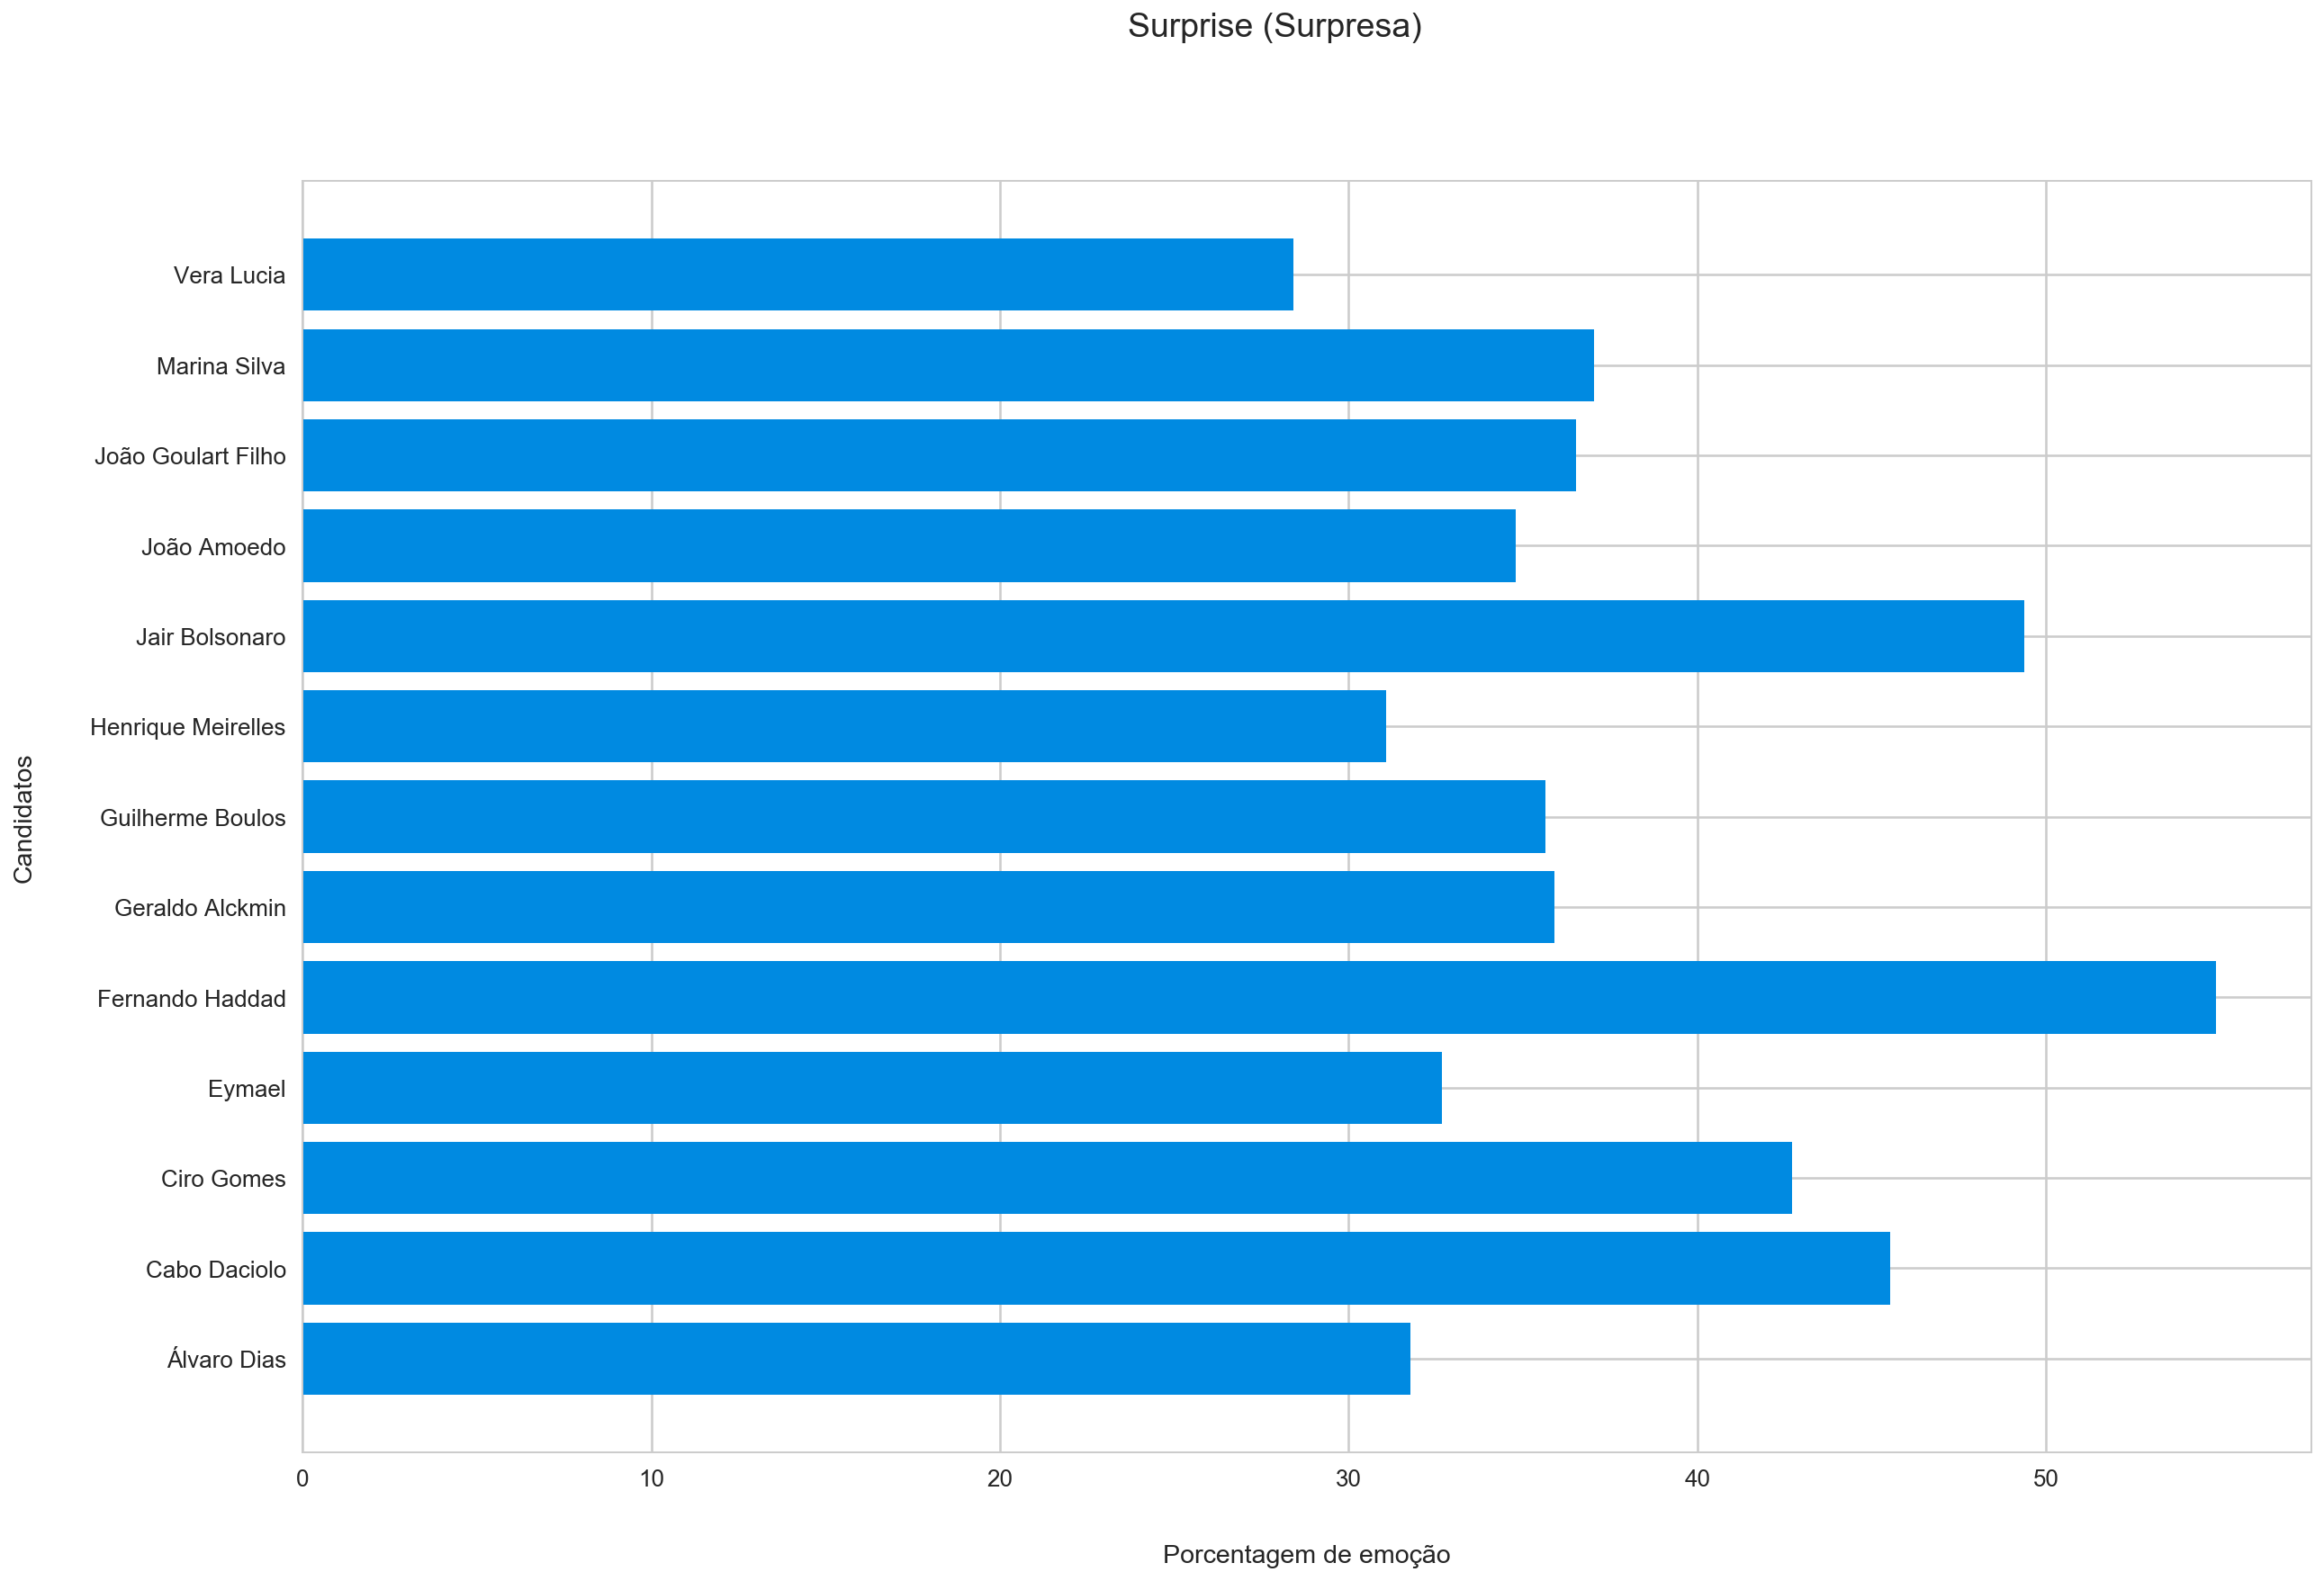

In [36]:
values = surprise_percent

plt.figure(1, figsize=(20, 13))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#008ae1')
plt.suptitle('Surprise (Surpresa)')
plt.show()

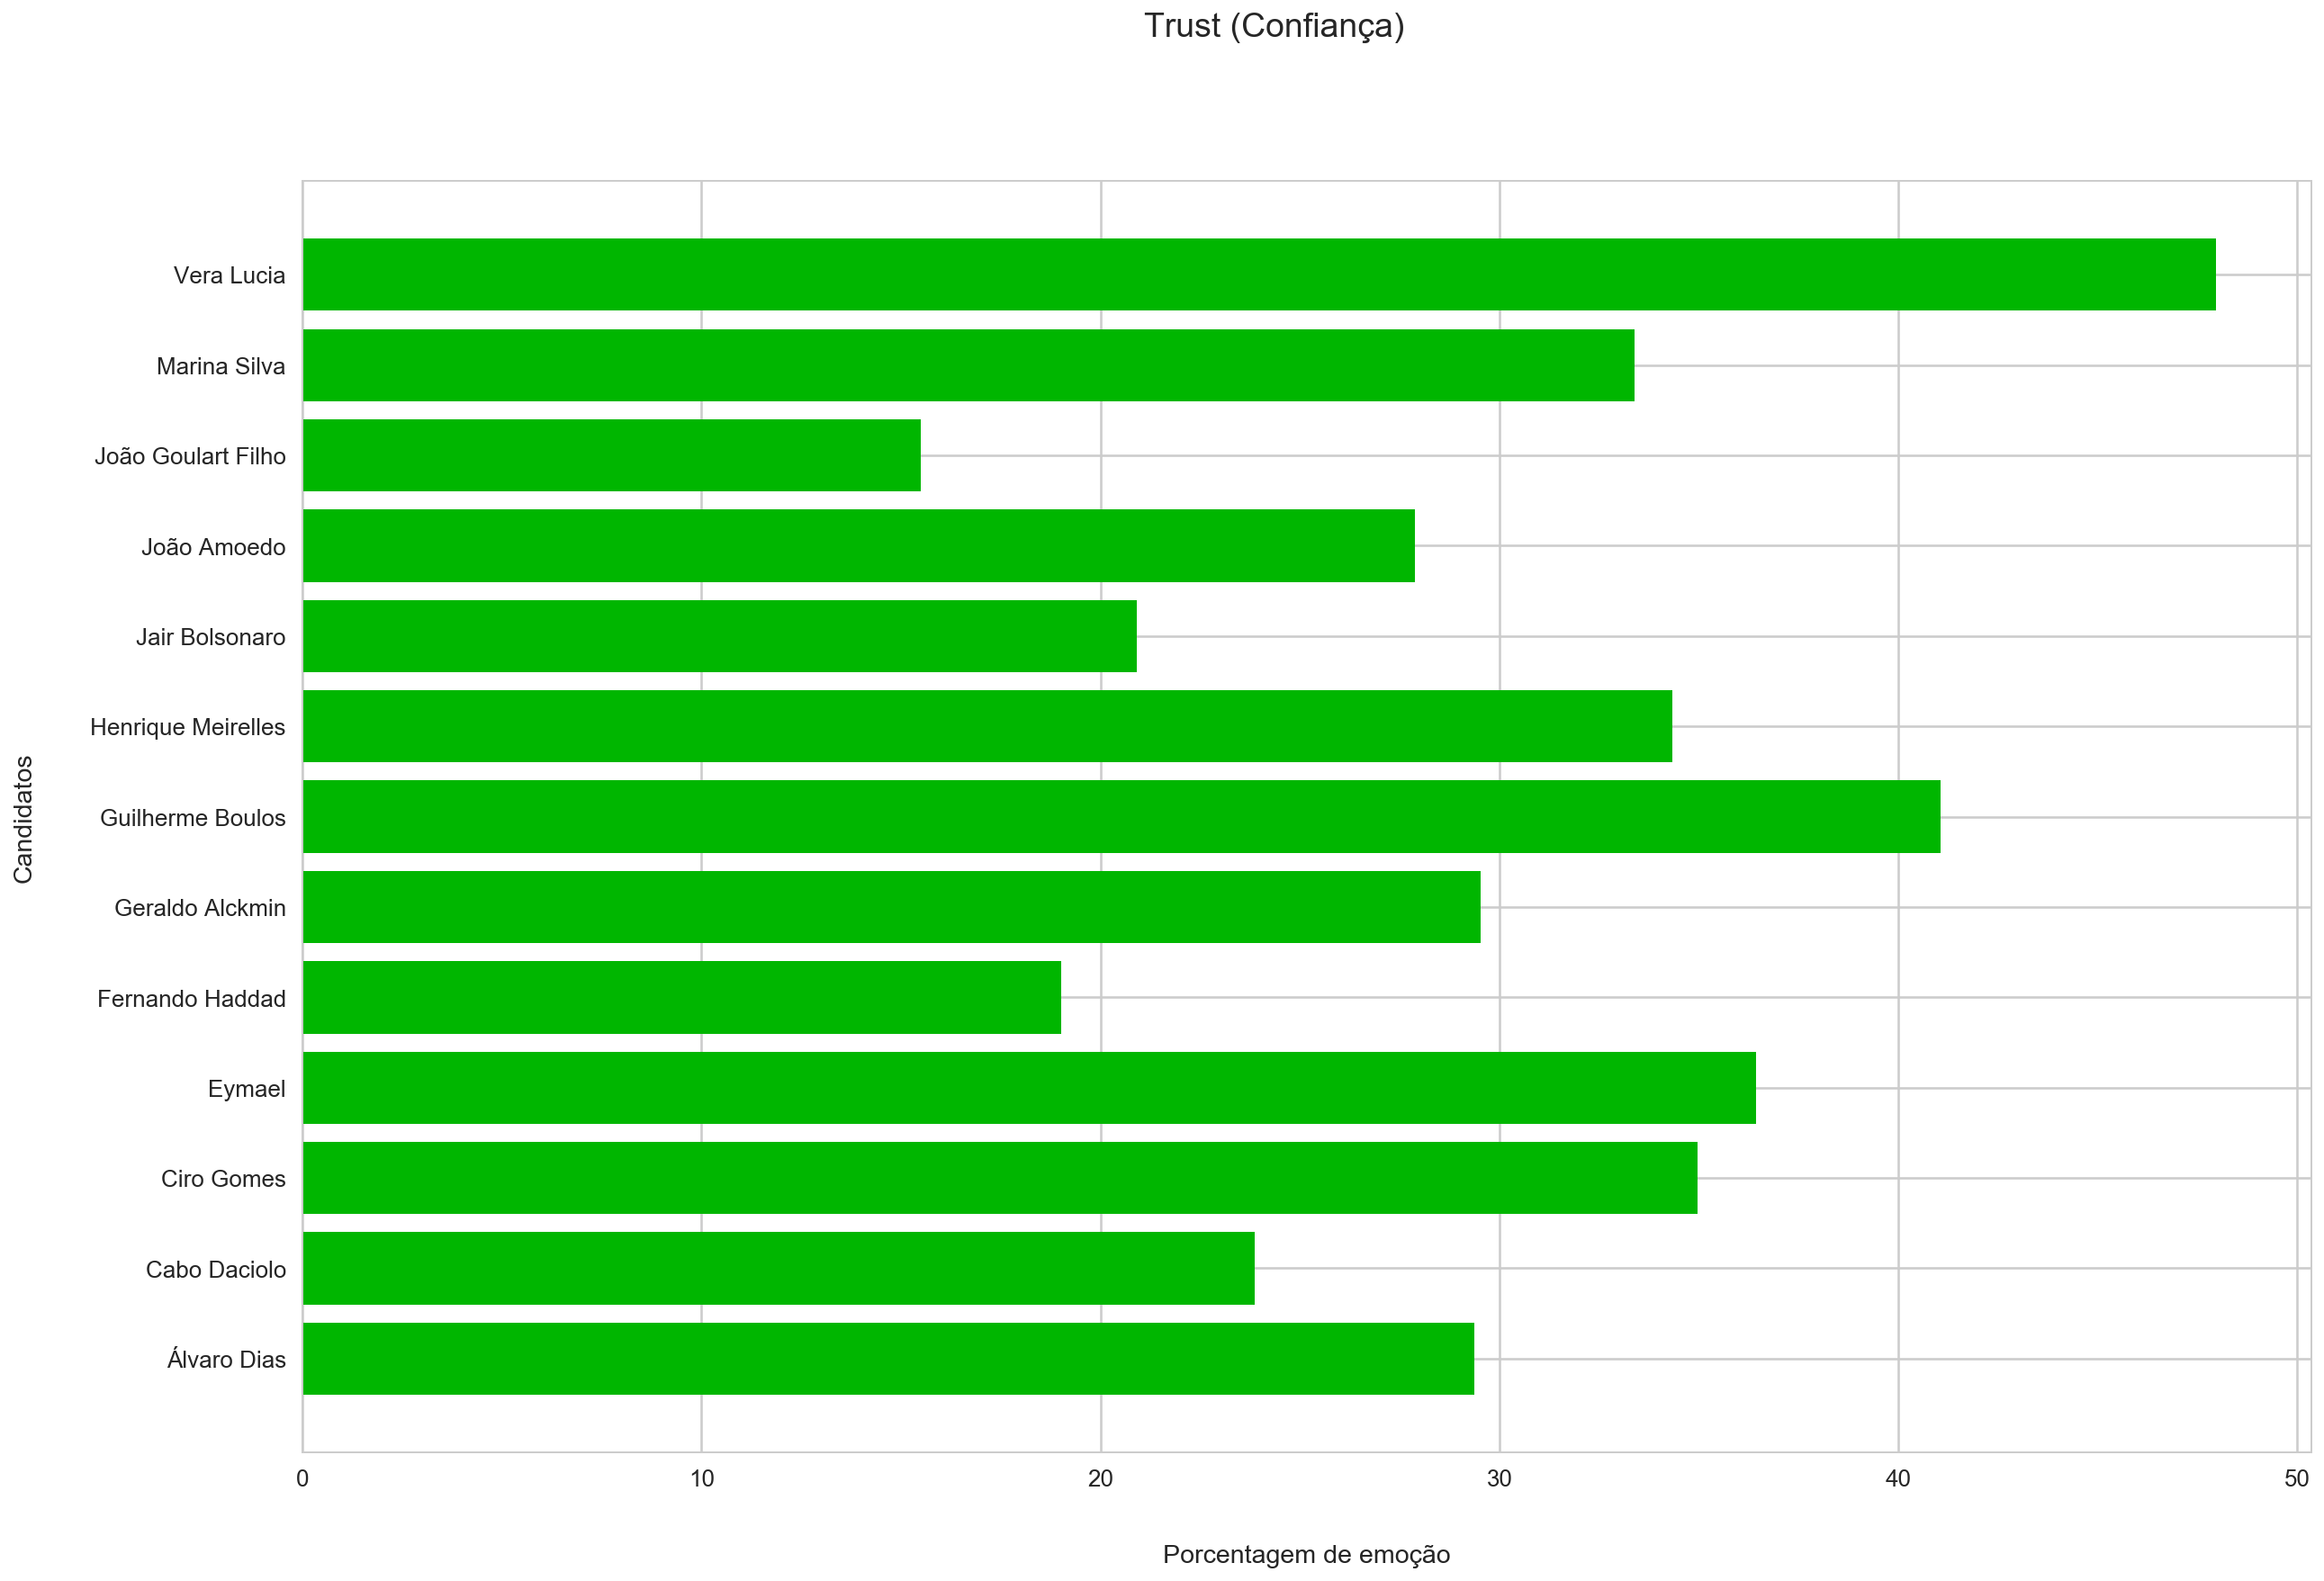

In [37]:
values = trust_percent

plt.figure(1, figsize=(20, 13))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#00b600')
plt.suptitle('Trust (Confiança)')
plt.show()

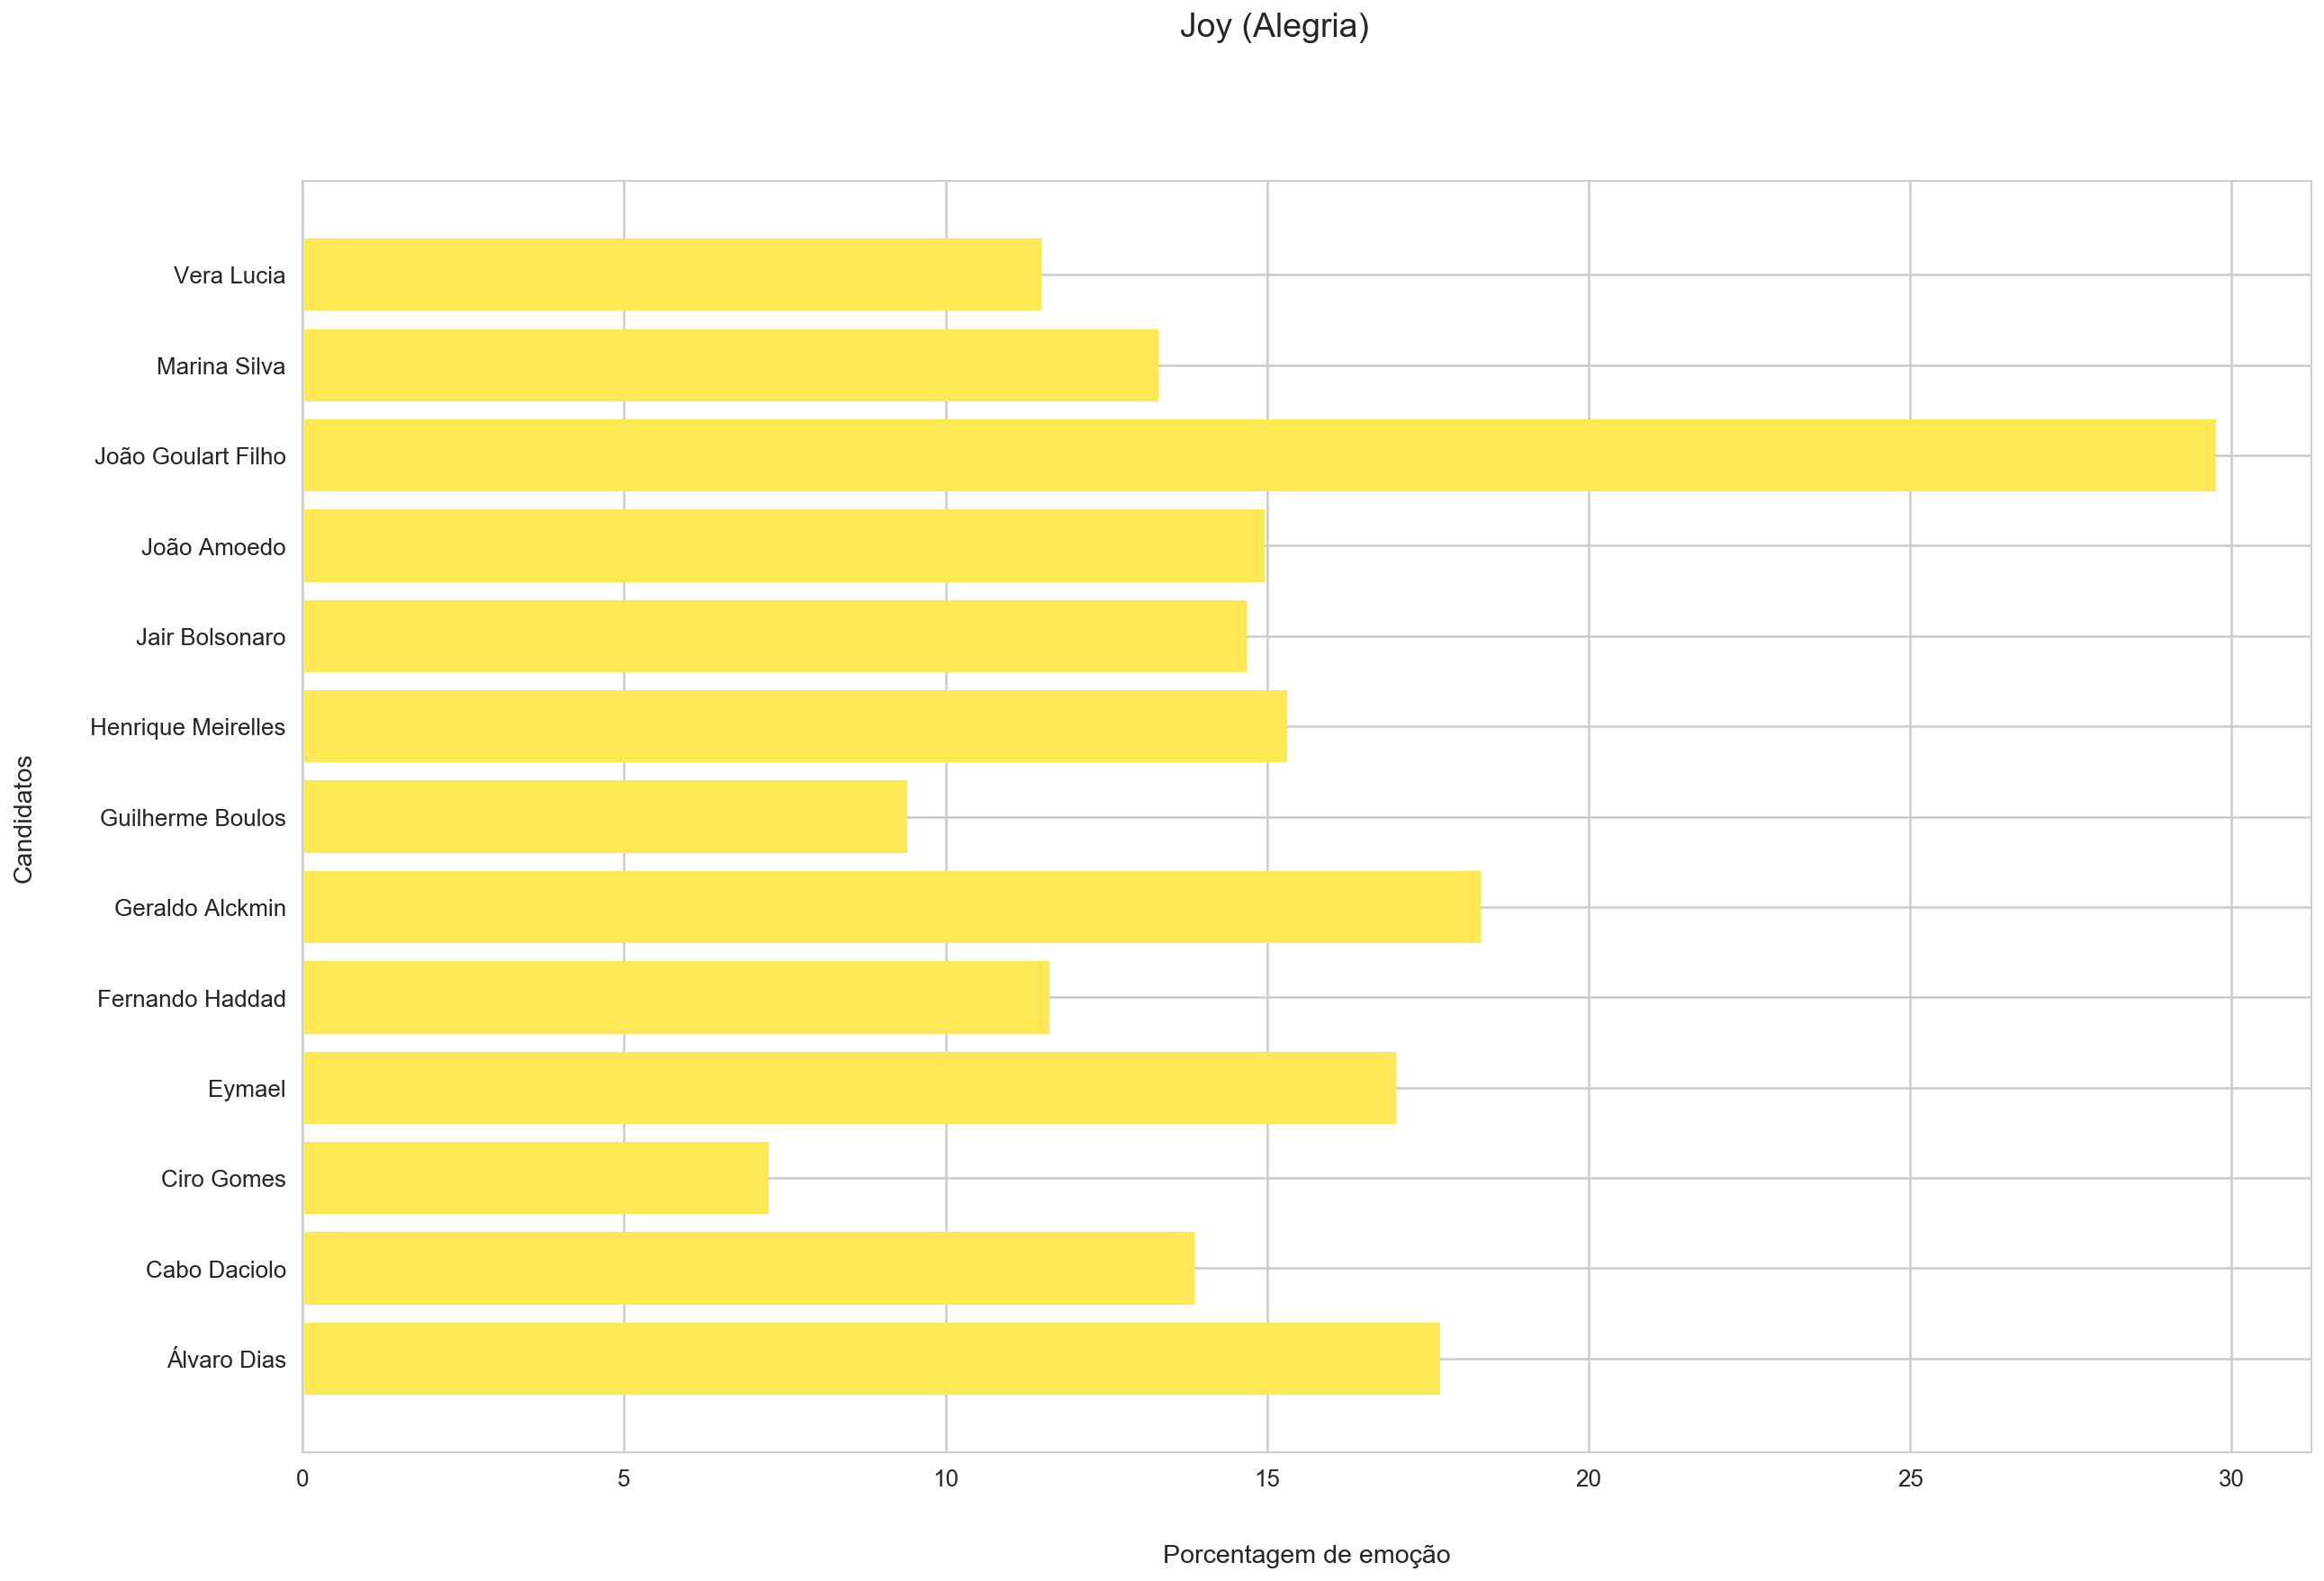

In [38]:
values = joy_percent

plt.figure(1, figsize=(20, 13))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#ffe853')
plt.suptitle('Joy (Alegria)')
plt.show()

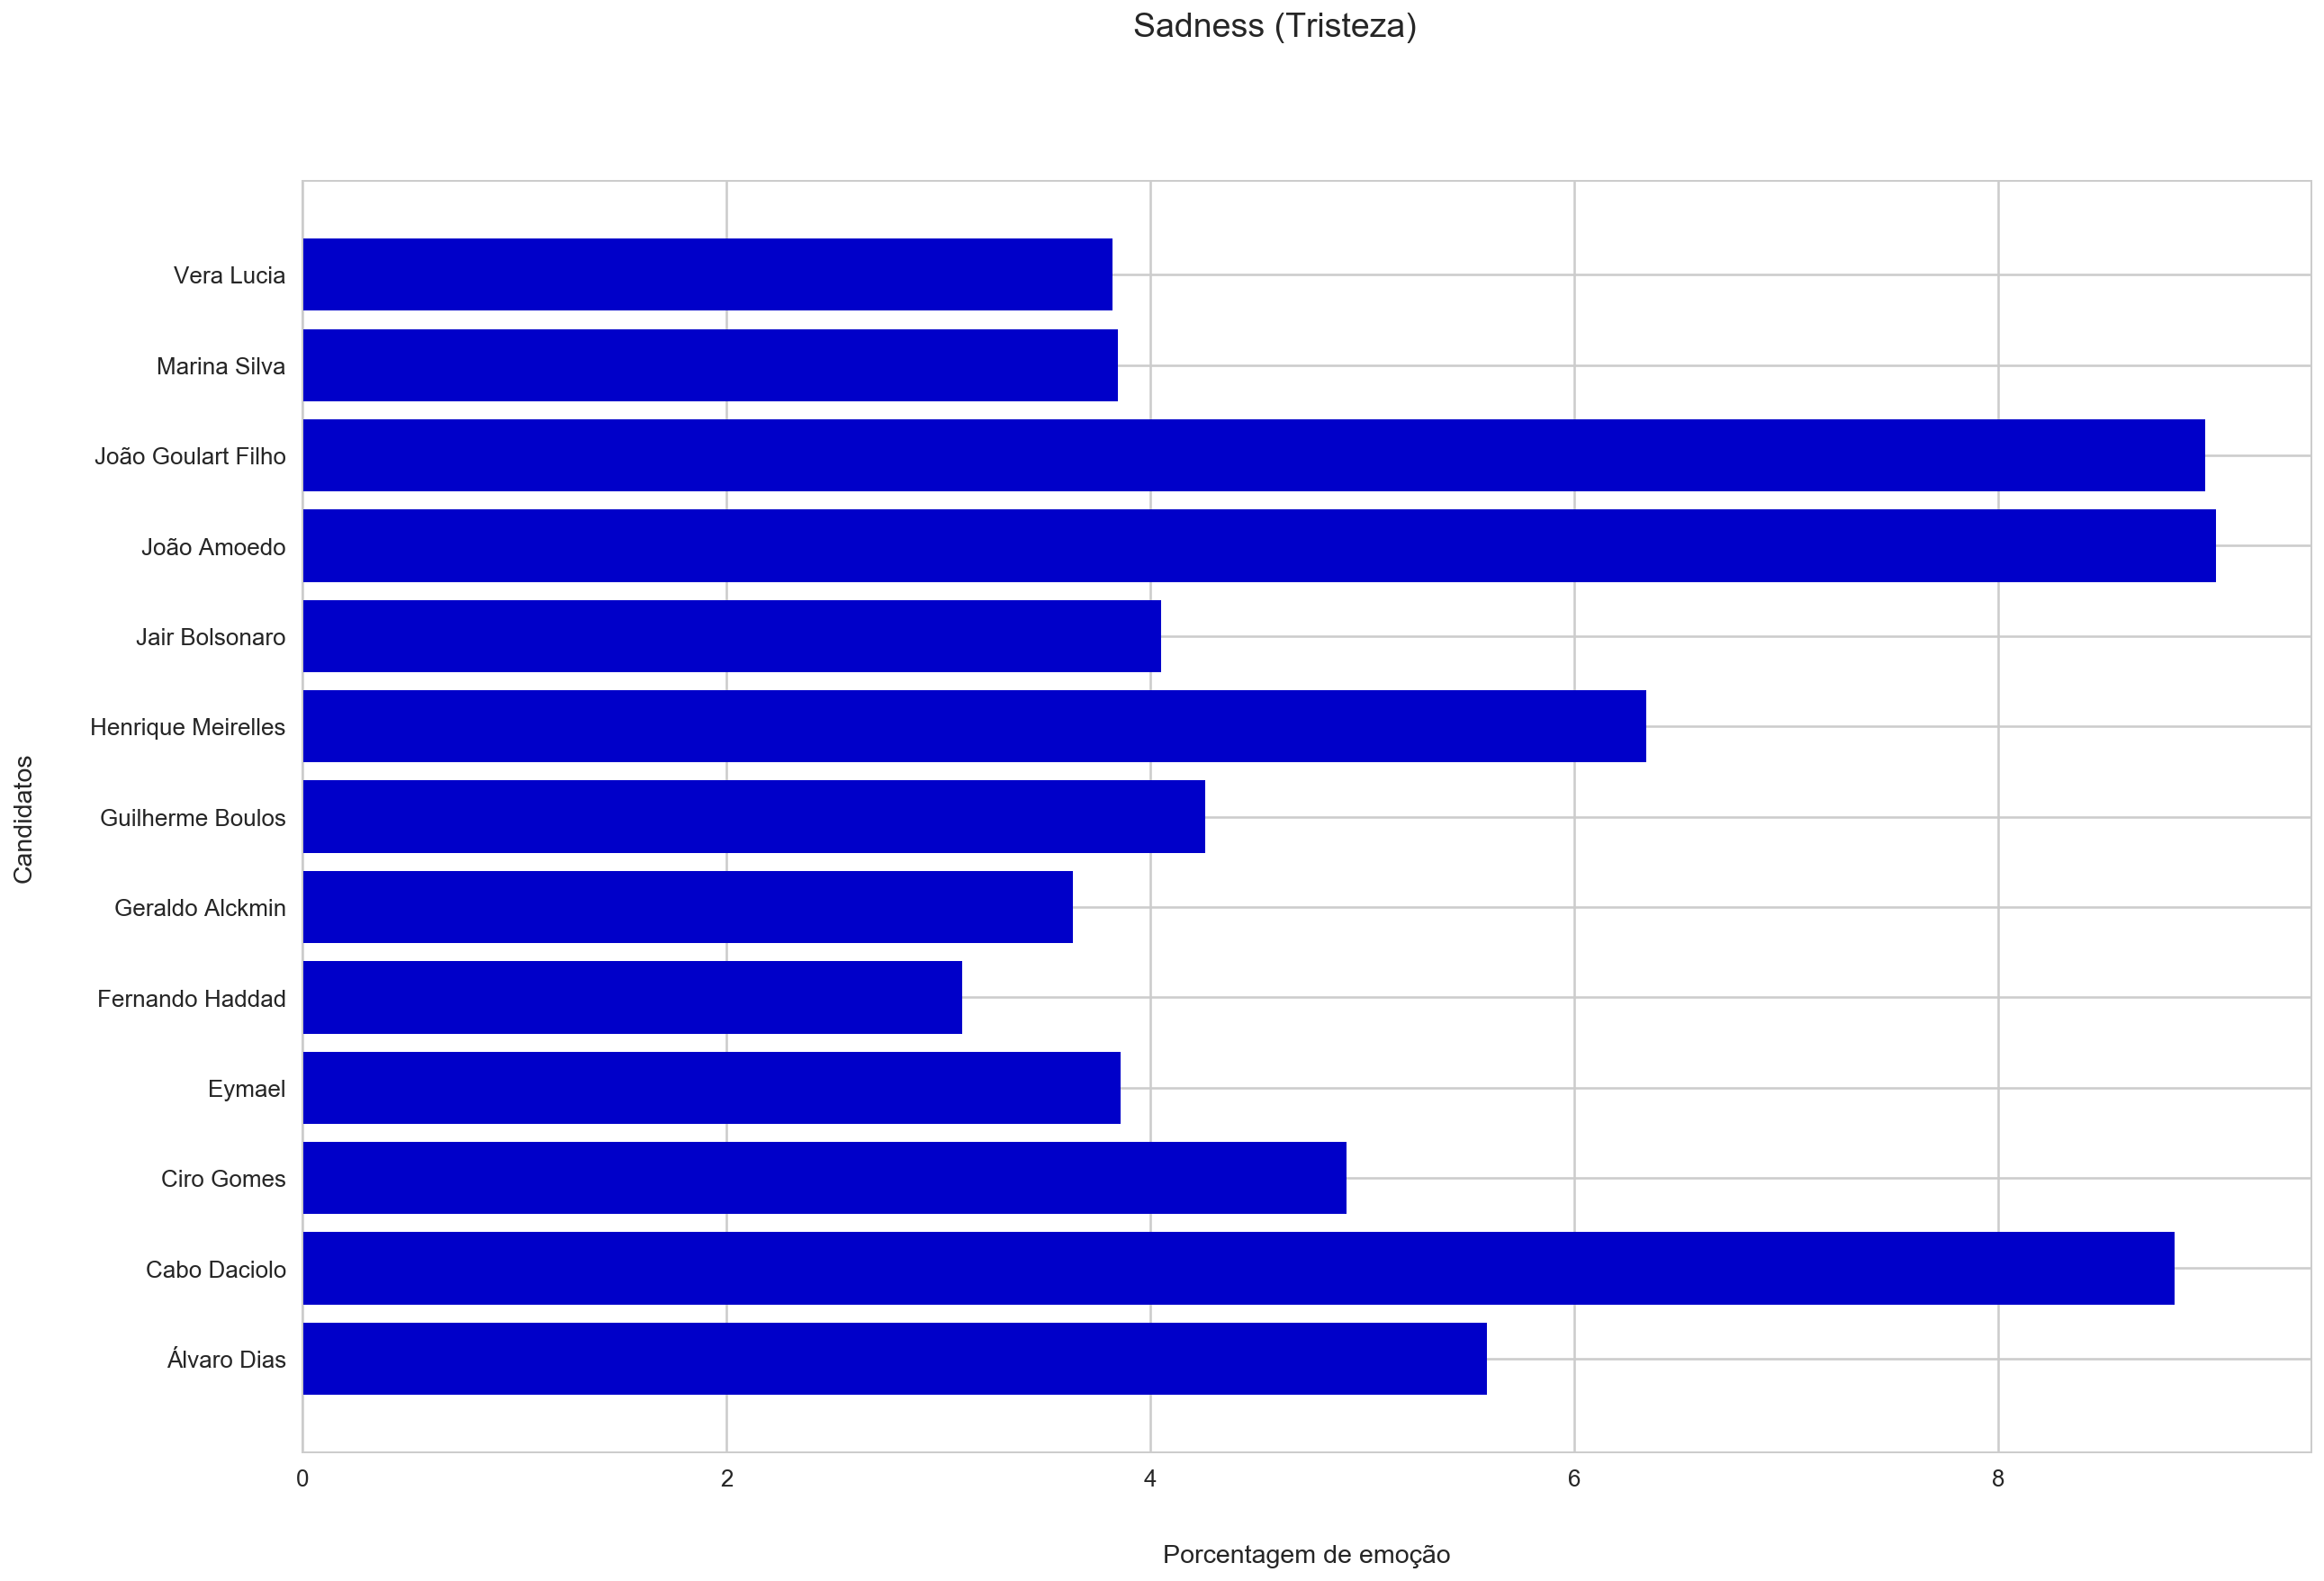

In [39]:
values = sadness_percent

plt.figure(1, figsize=(20, 13))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#0000c9')
plt.suptitle('Sadness (Tristeza)')
plt.show()

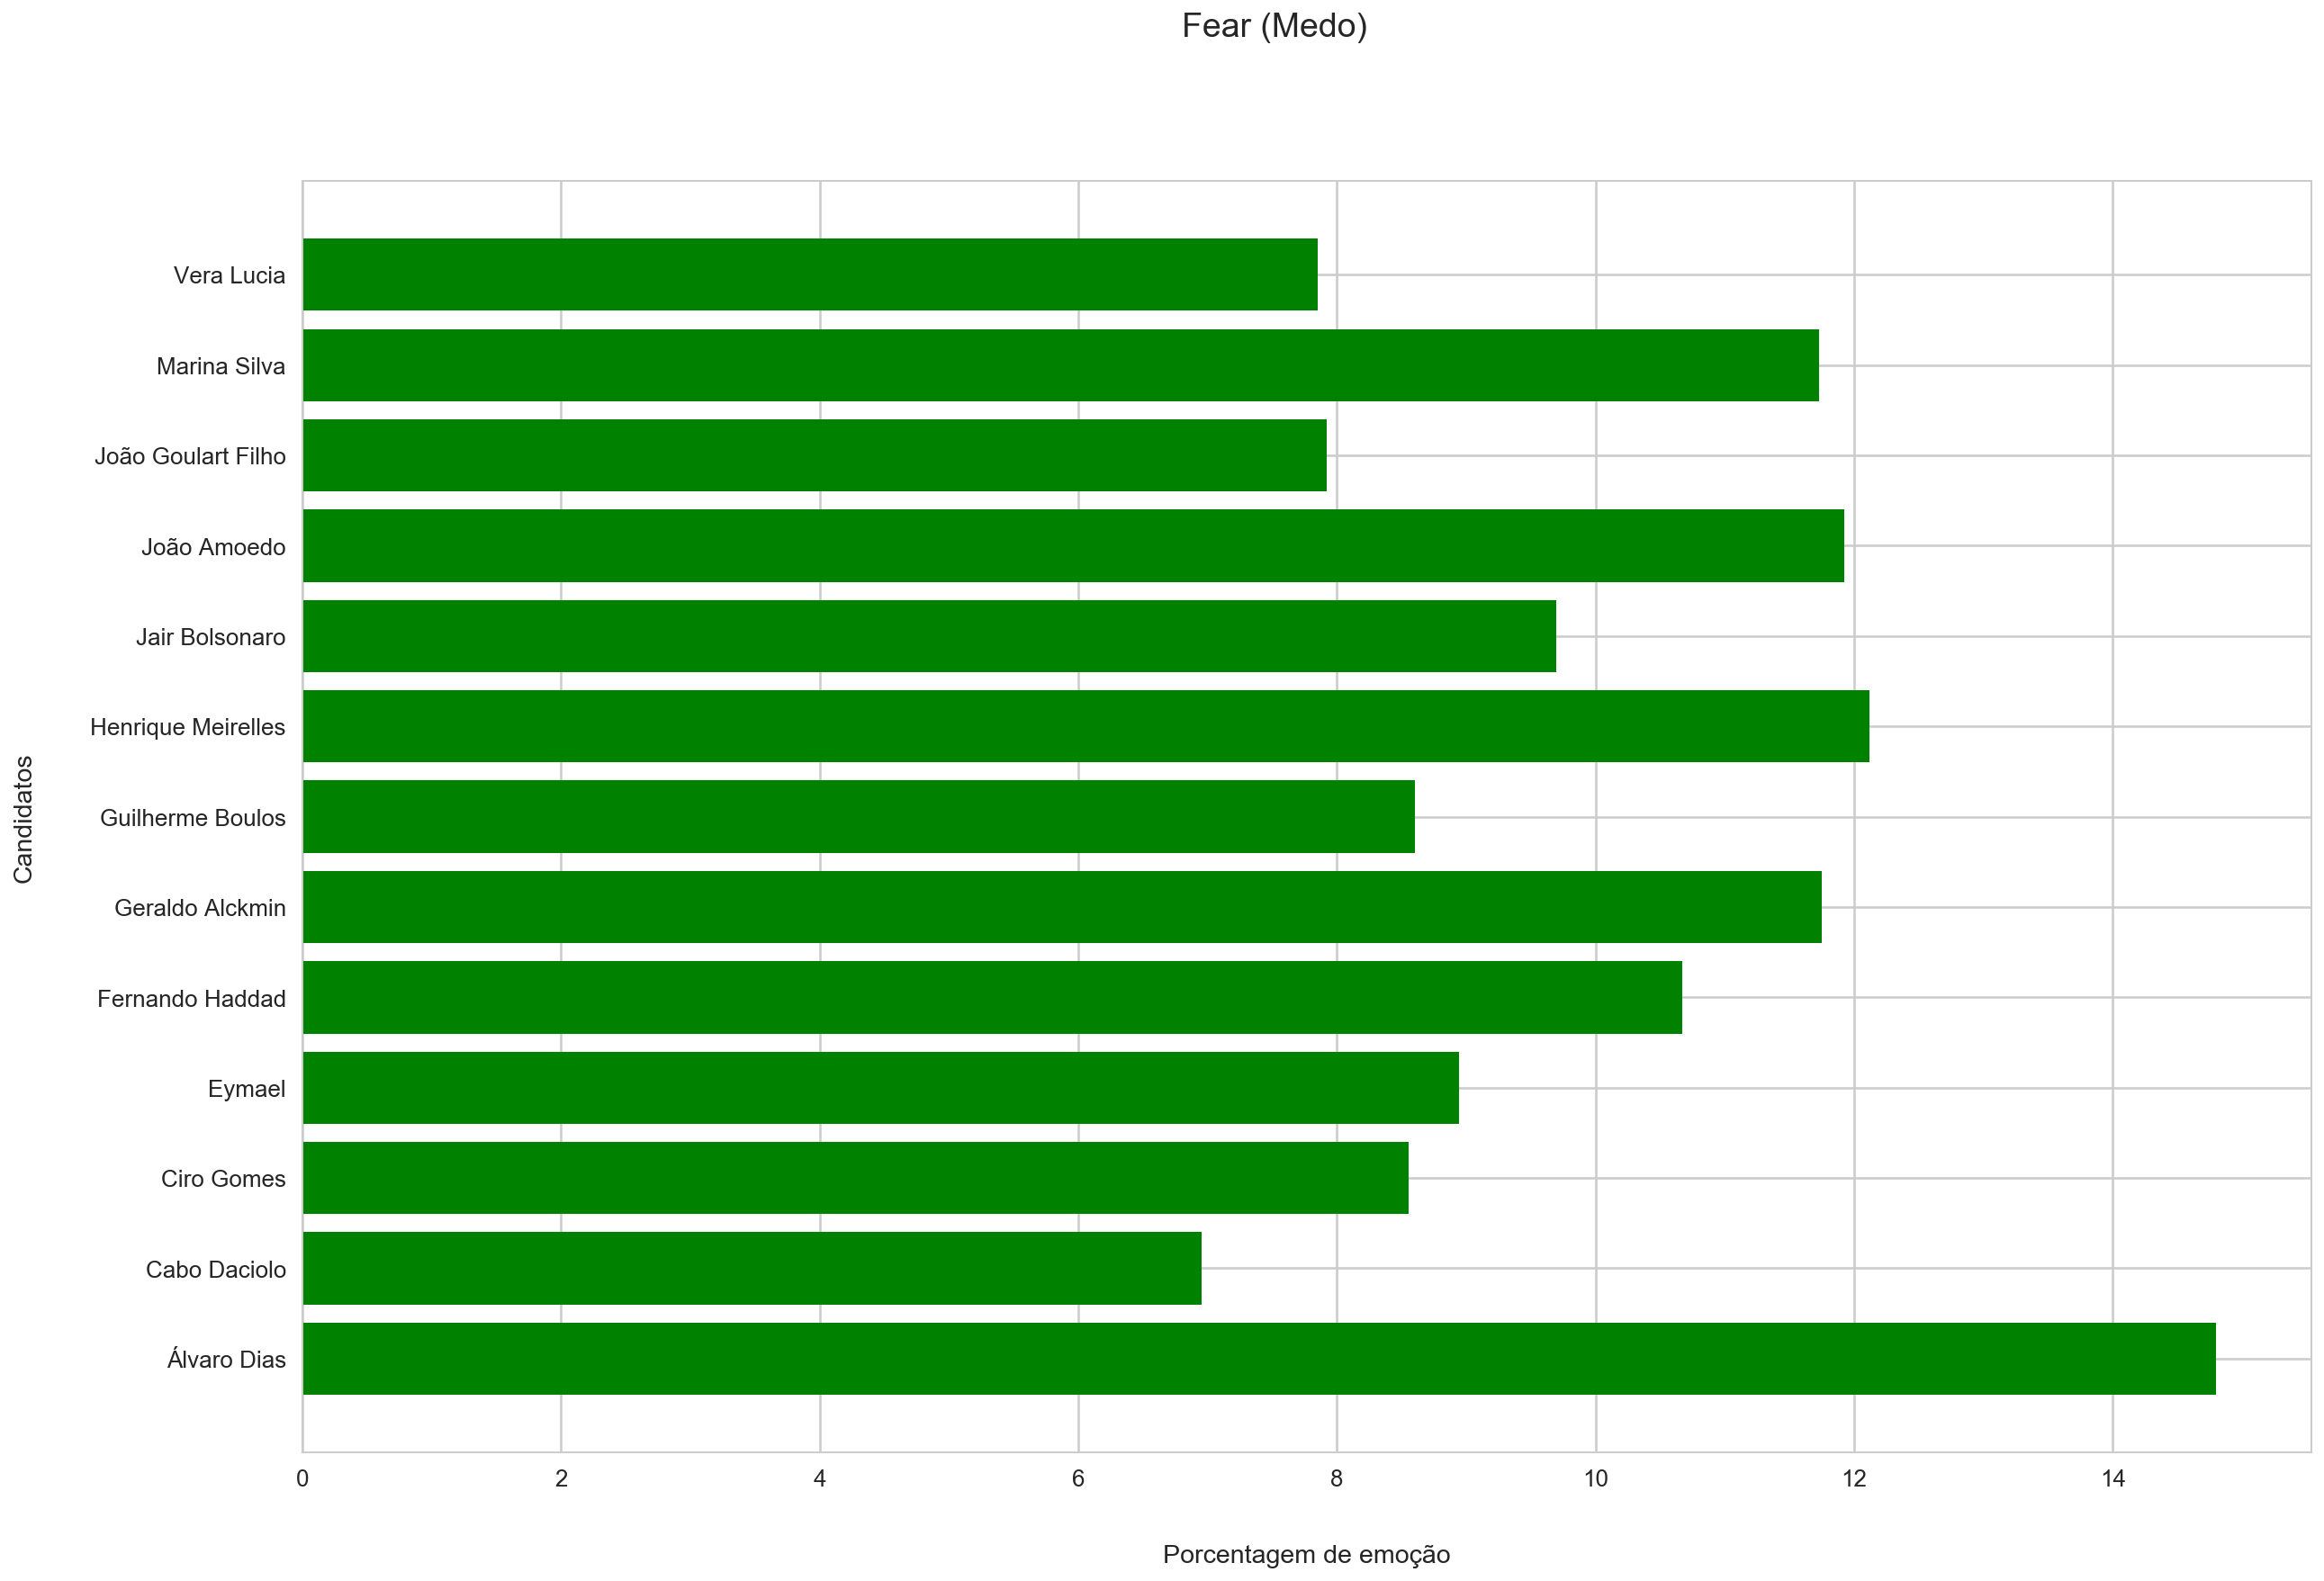

In [40]:
values = fear_percent

plt.figure(1, figsize=(20, 13))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#008100')
plt.suptitle('Fear (Medo)')
plt.show()

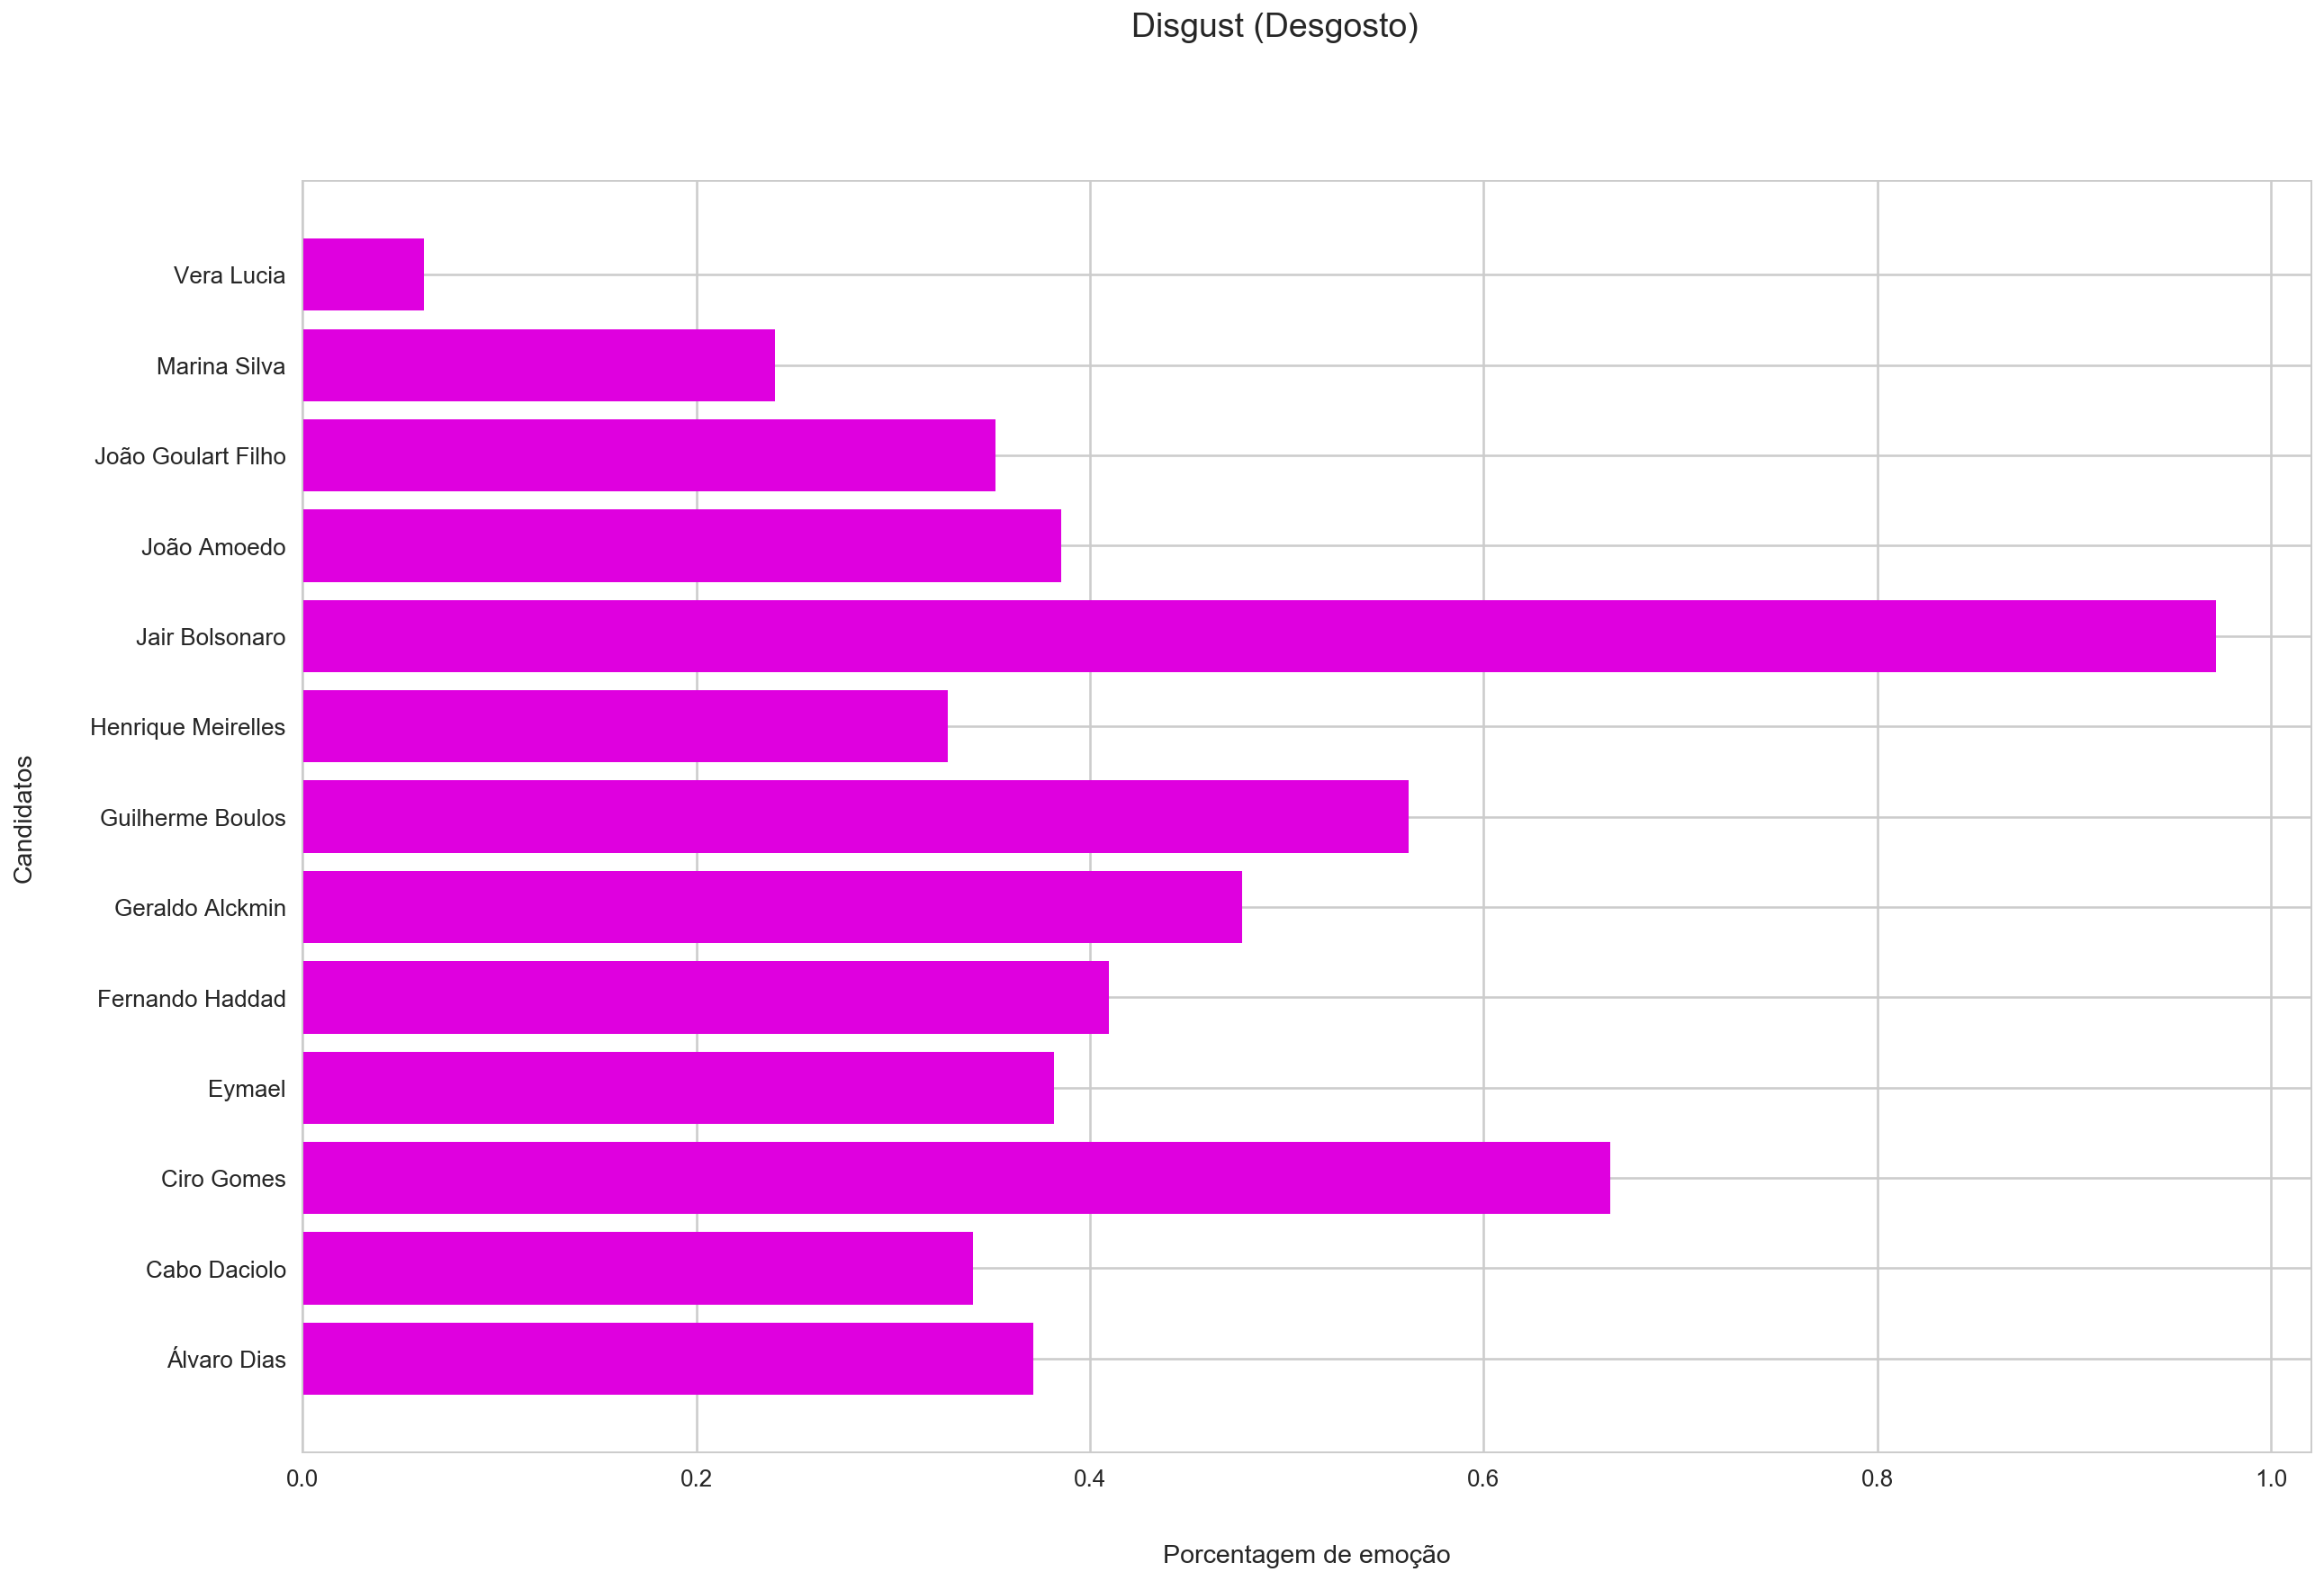

In [41]:
values = disgust_percent

plt.figure(1, figsize=(20, 13))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#df00df')
plt.suptitle('Disgust (Desgosto)')
plt.show()

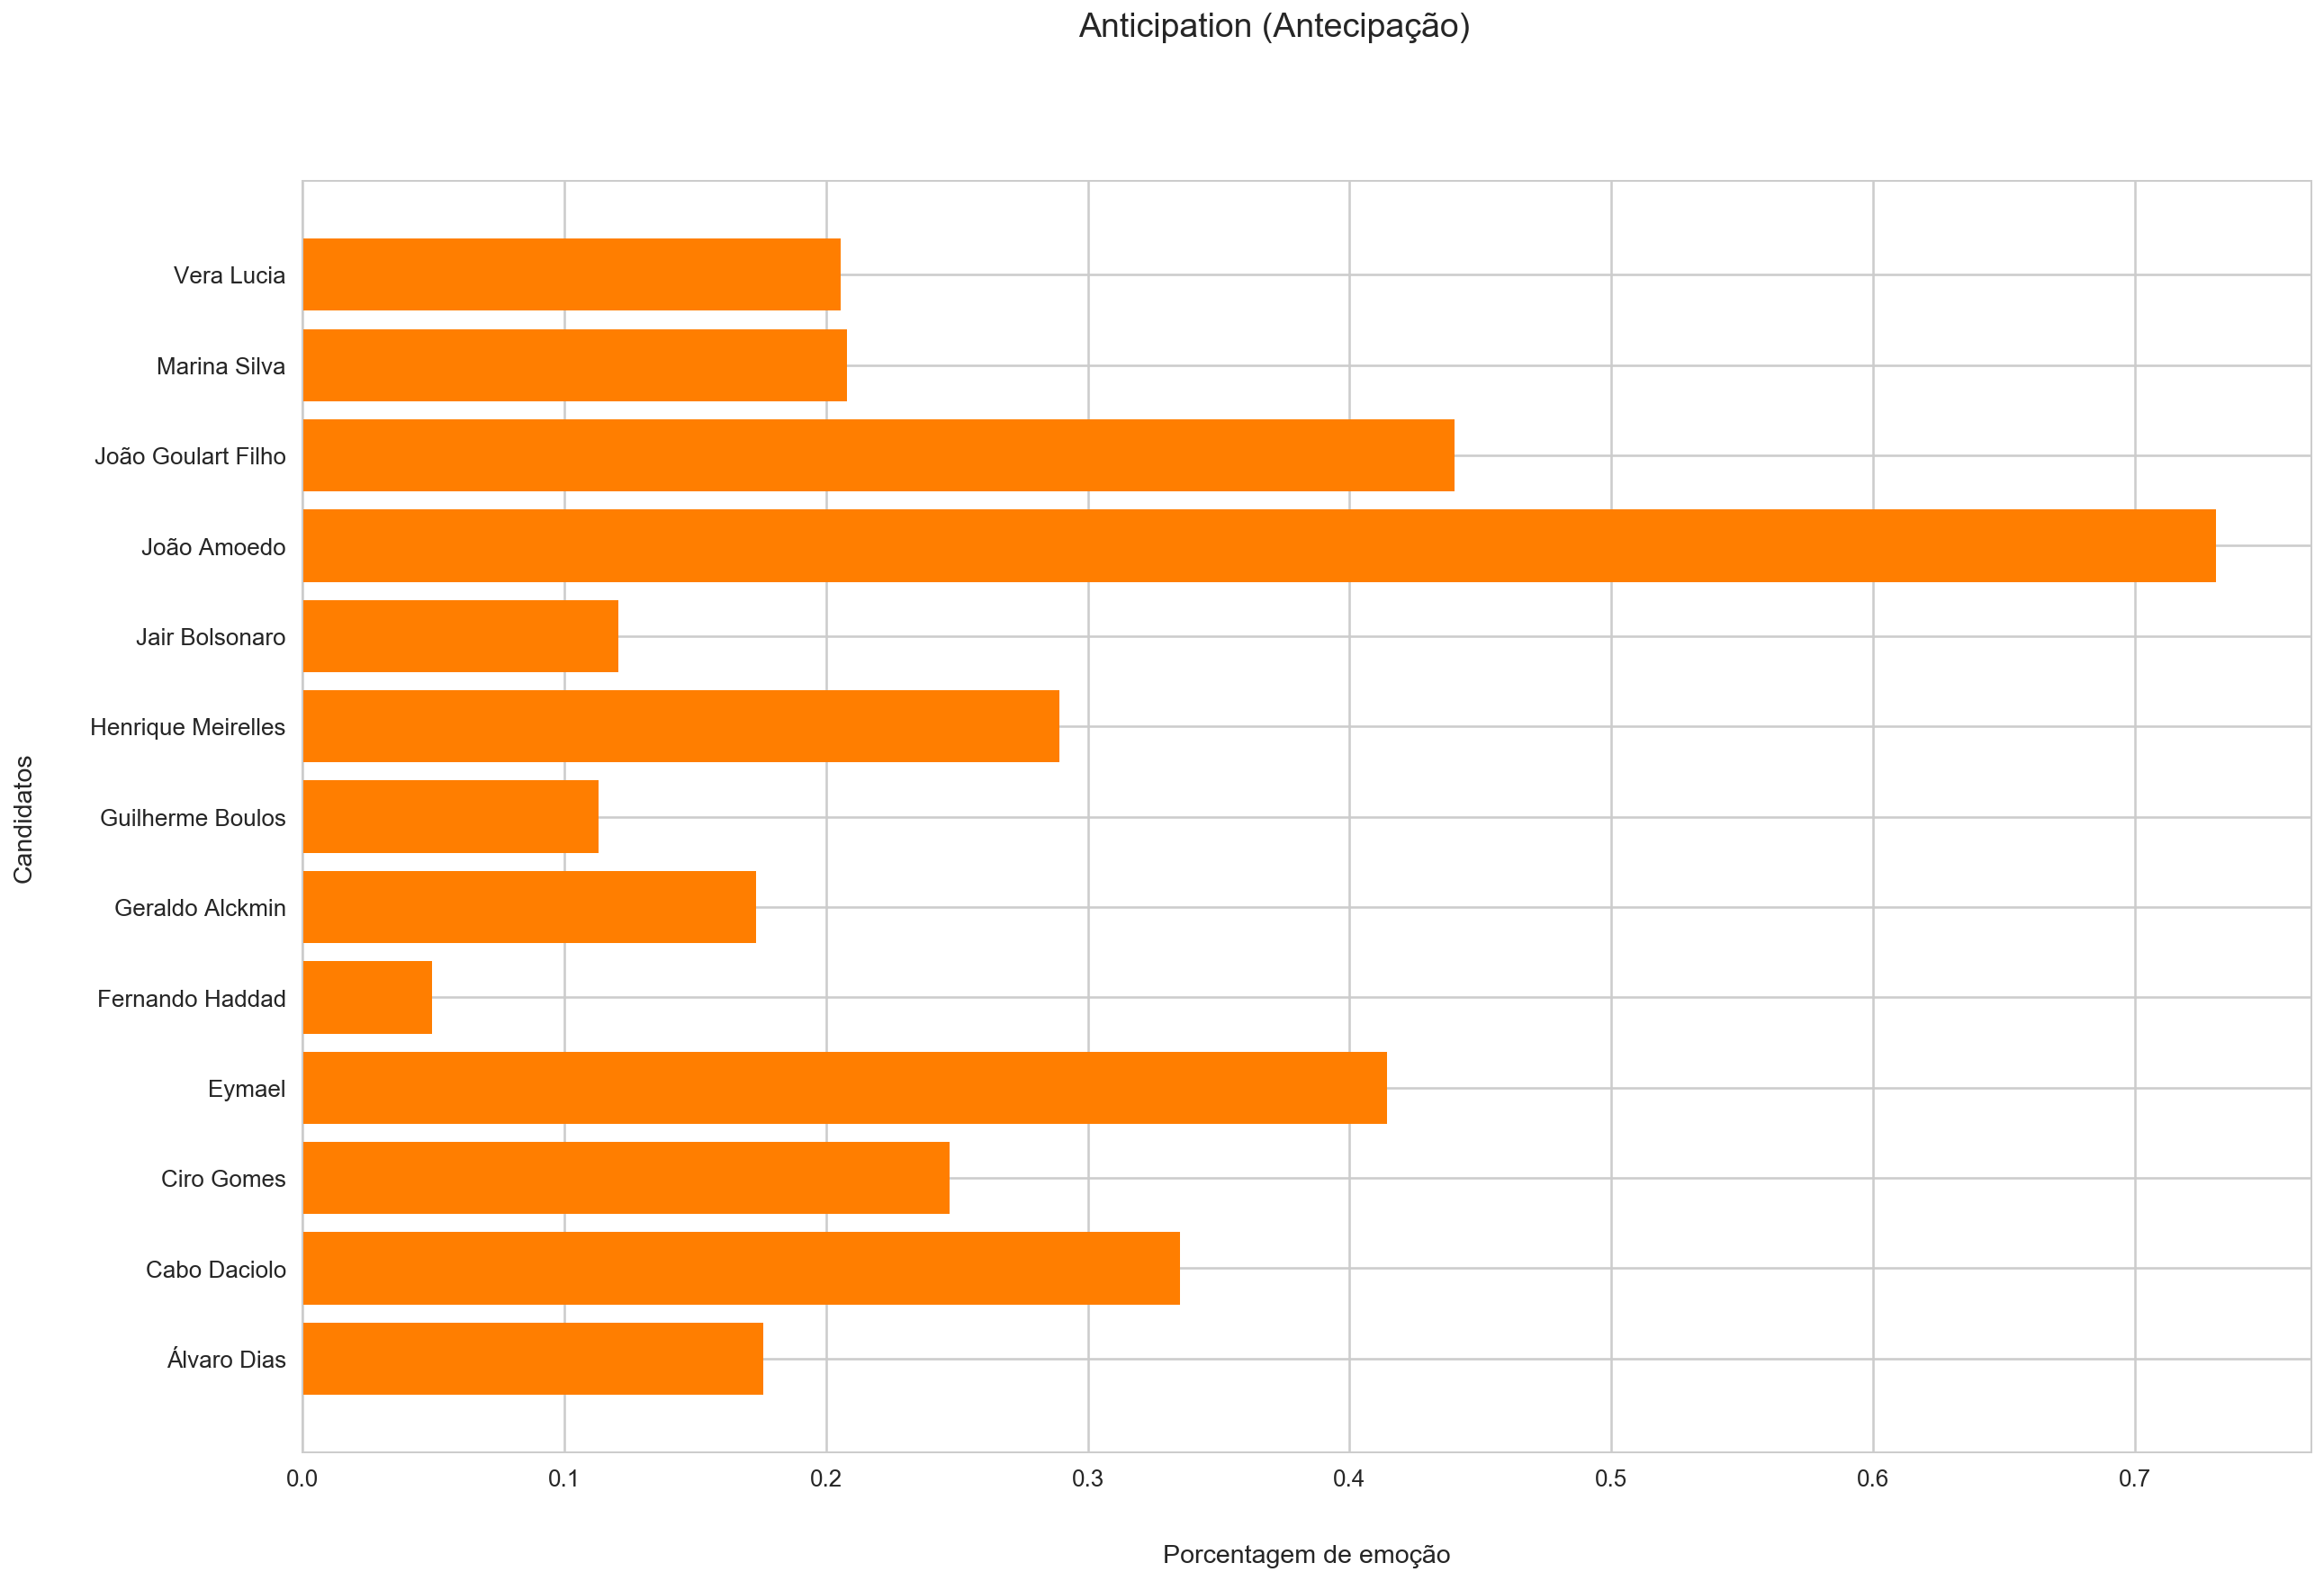

In [42]:
values = anticipation_percent

plt.figure(1, figsize=(20, 13))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#ff7e00')
plt.suptitle('Anticipation (Antecipação)')
plt.show()

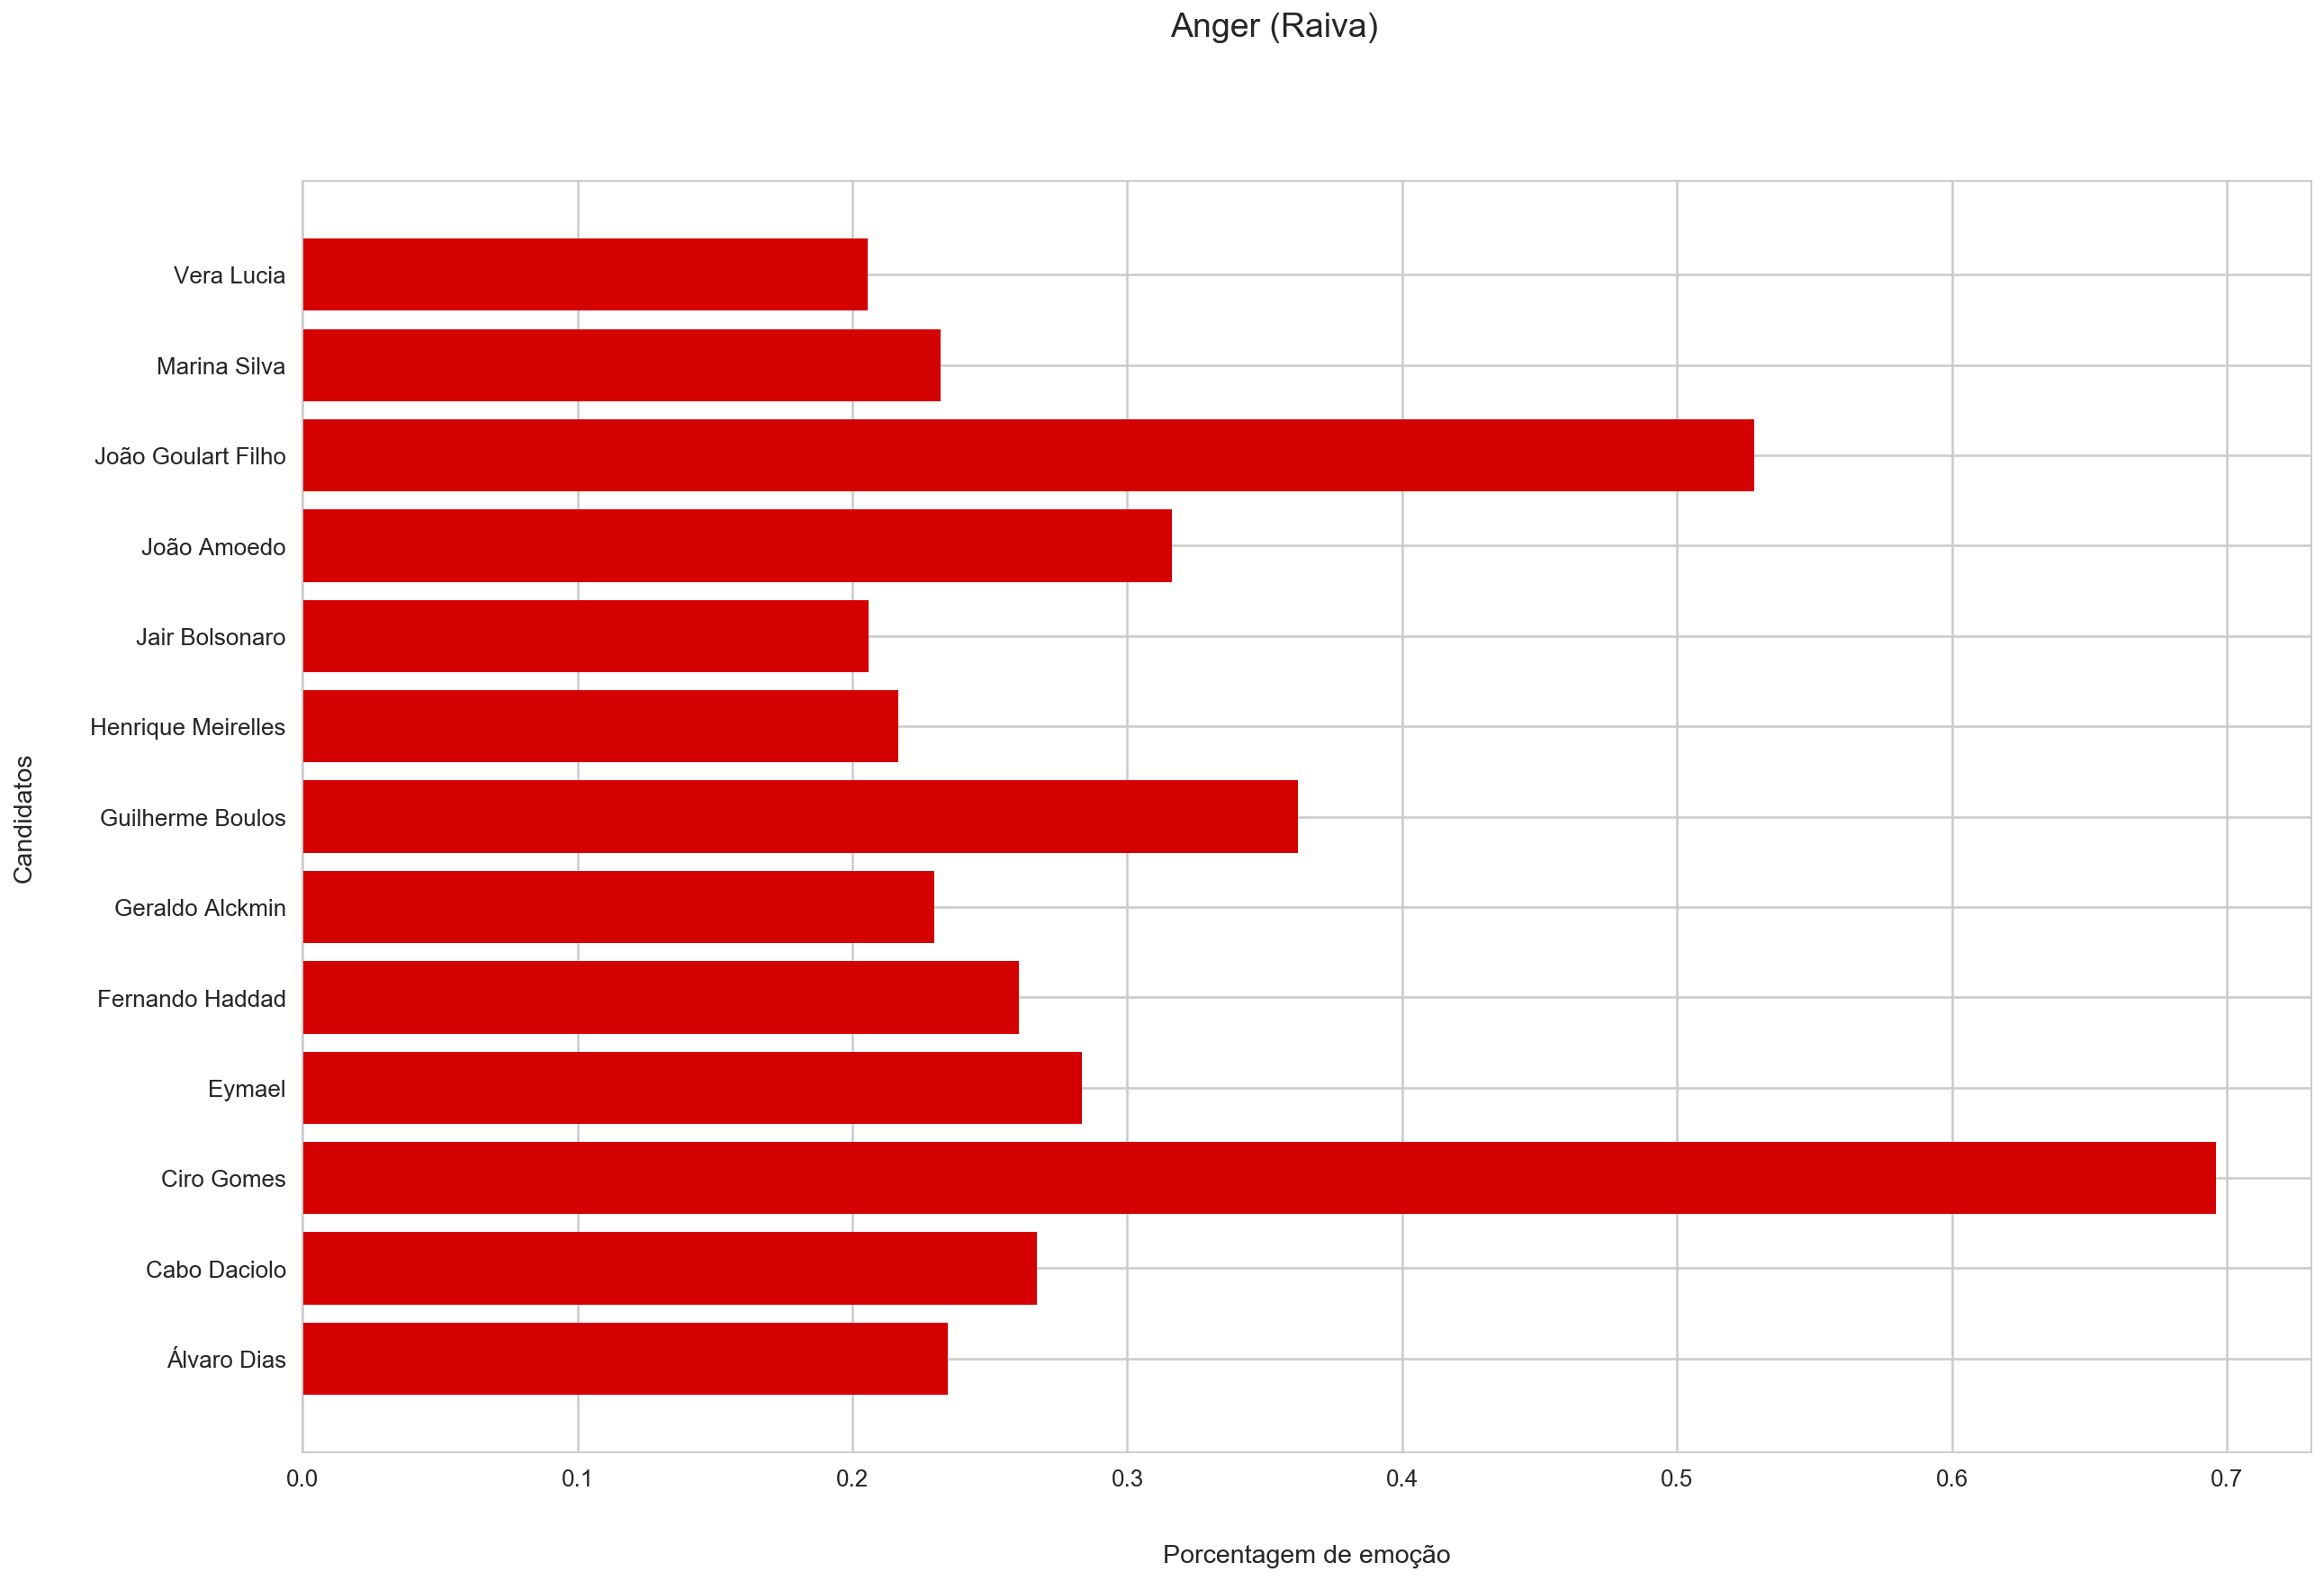

In [43]:
values = anger_percent

plt.figure(1, figsize=(20, 13))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#d50000')
plt.suptitle('Anger (Raiva)')
plt.show()

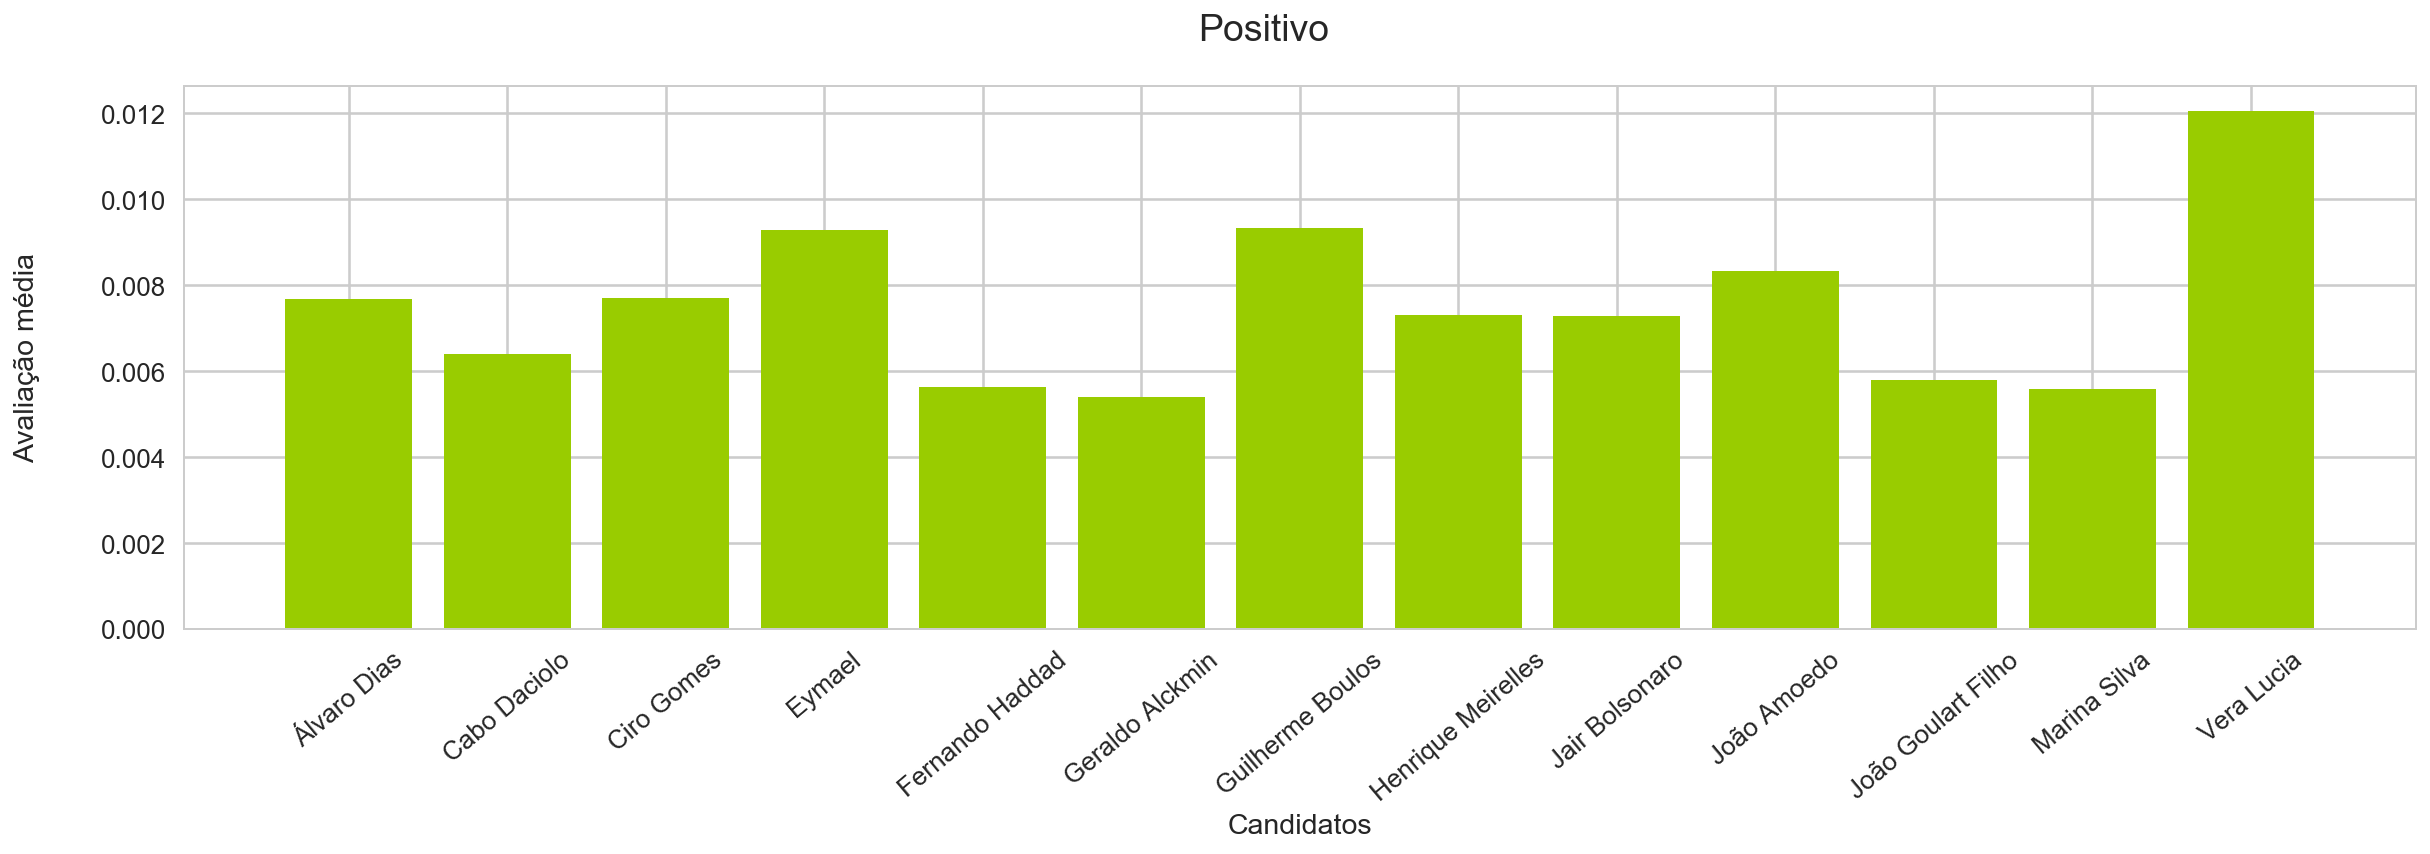

In [44]:
values = pos_percent

plt.figure(1, figsize=(20, 5))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Candidatos')
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.xticks(rotation=40)
plt.suptitle('Positivo')
plt.show()

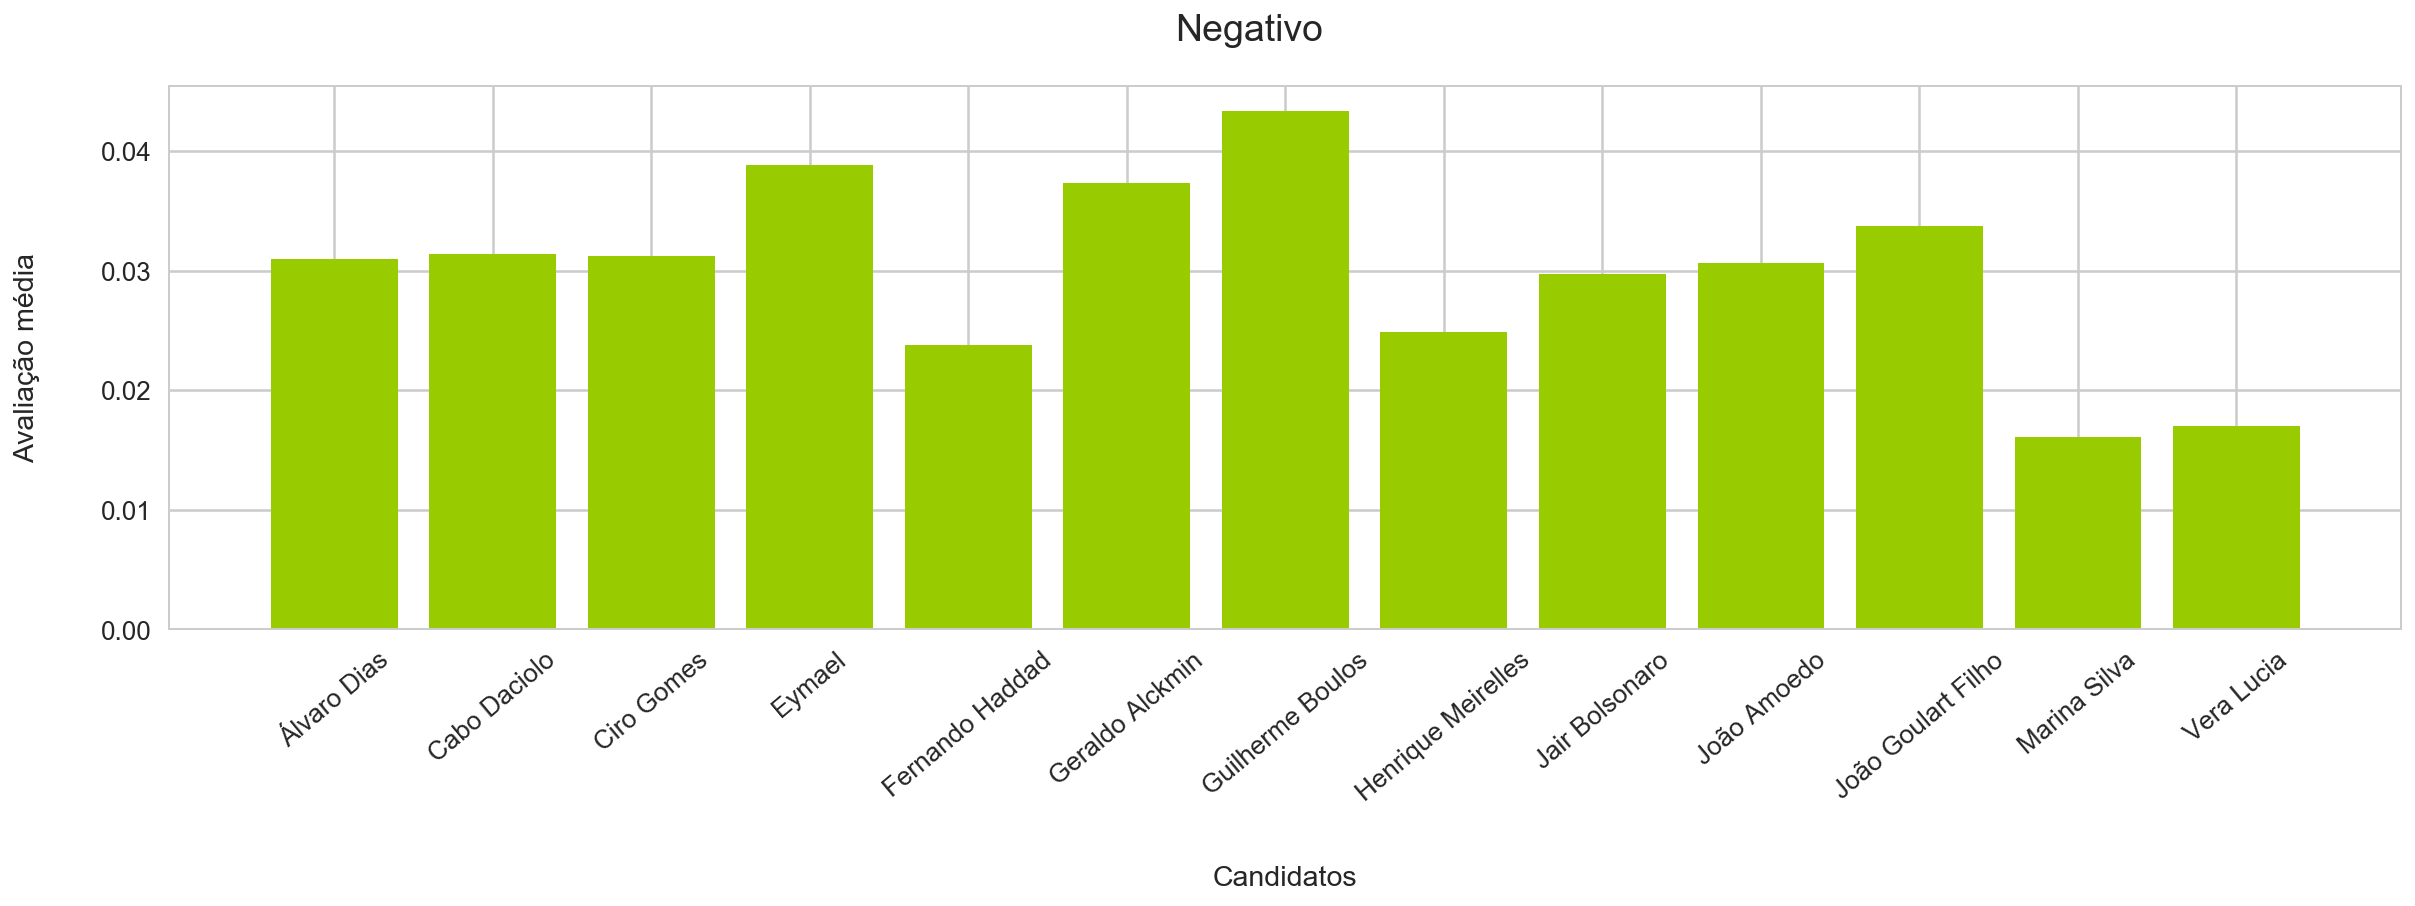

In [45]:
values = neg_percent

plt.figure(1, figsize=(20, 5))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Candidatos', labelpad=30)
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.xticks(rotation=40)
plt.suptitle('Negativo')
plt.show()

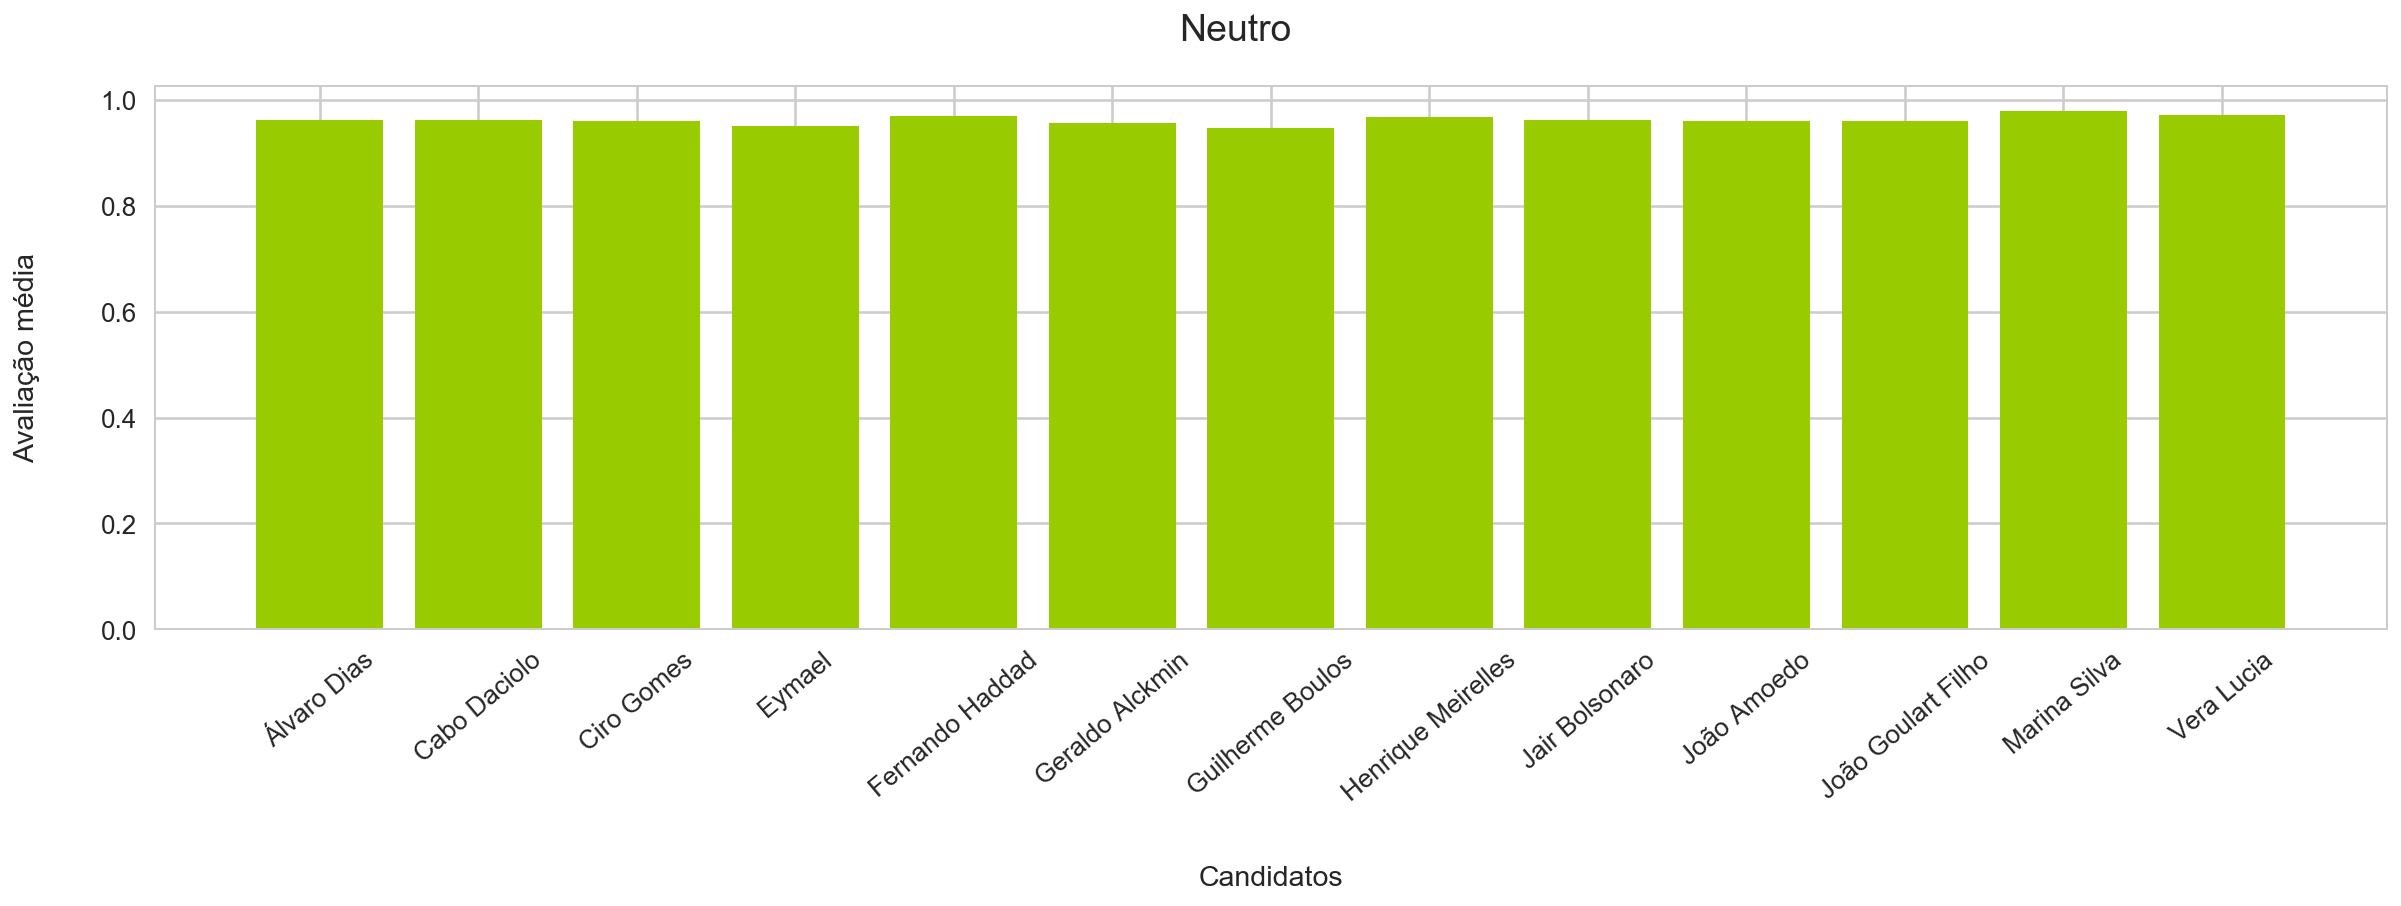

In [46]:
values = neu_percent

plt.figure(1, figsize=(20, 5))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Candidatos', labelpad=30)
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.xticks(rotation=40)
plt.suptitle('Neutro')
plt.show()

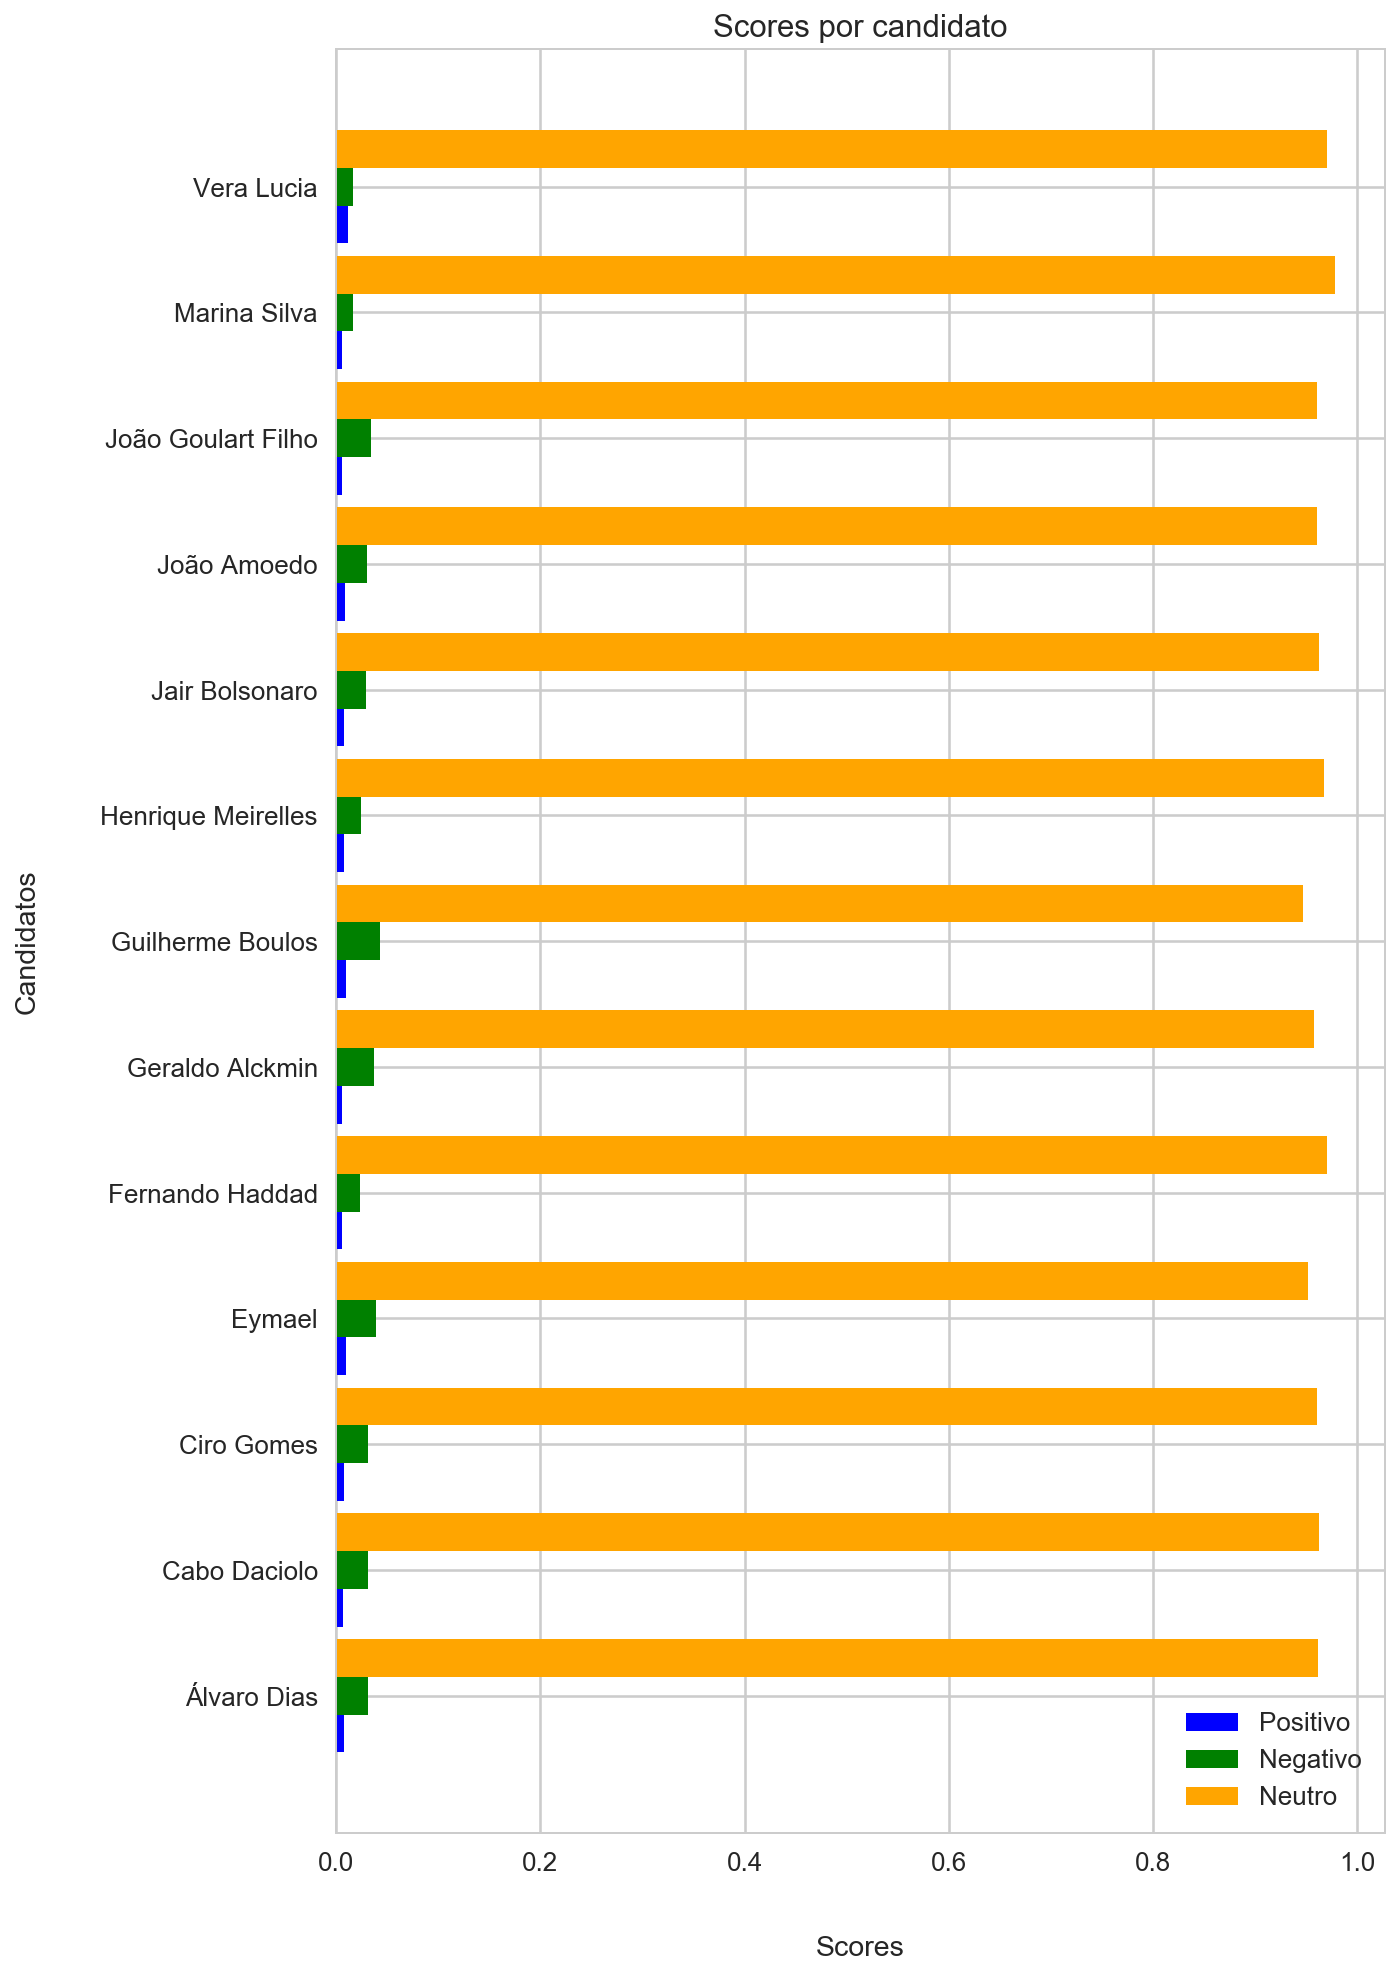

In [47]:
plt.rcParams['figure.figsize'] = (10,14)

# data to plot
n_groups = 13
pos = pos_percent
neg = neg_percent
neu = neu_percent
 
# create plot
index = np.arange(n_groups)
bar_width = 0.3
 
rects1 = plt.barh(index, pos, bar_width,
                 color='b',
                 label='Positivo')
 
rects2 = plt.barh(index + bar_width, neg, bar_width,
                 color='g',
                 label='Negativo')

rects3 = plt.barh(index + bar_width + bar_width, neu, bar_width,
                 color='orange',
                 label='Neutro')
 
plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Scores', labelpad=30)
plt.title('Scores por candidato')
plt.yticks(index + bar_width, names)
plt.legend()
 
plt.tight_layout()
plt.show()

## Segundo Turno

In [48]:
for candidato, data_frame in turno_2.items():
    print(candidato)
    print(data_frame['Emotion'].value_counts())
    print('')

Fernando Haddad
Surprise        22872
Joy             22029
Trust           17224
Sadness          7336
Fear             4746
Disgust           504
Anger             142
Anticipation      128
Name: Emotion, dtype: int64

Jair Bolsonaro
Surprise        21691
Joy             21053
Trust           19005
Sadness          7334
Fear             4916
Disgust           590
Anticipation      173
Anger             143
Name: Emotion, dtype: int64



In [49]:
surprise_percent, trust_percent, joy_percent, fear_percent, sadness_percent, disgust_percent, anger_percent, anticipation_percent, pos_percent, neg_percent, neu_percent, compound_percent = [],[],[],[],[],[],[],[],[],[],[],[]

def emocao_valor(df):    
    surprise_percent.append(df['Emotion'].value_counts()['Surprise'] / len(df) * 100)
    trust_percent.append(df['Emotion'].value_counts()['Trust'] / len(df) * 100)
    joy_percent.append(df['Emotion'].value_counts()['Joy'] / len(df) * 100)
    sadness_percent.append(df['Emotion'].value_counts()['Sadness'] / len(df) * 100)
    fear_percent.append(df['Emotion'].value_counts()['Fear'] / len(df) * 100)
    disgust_percent.append(df['Emotion'].value_counts()['Disgust'] / len(df) * 100)
    anticipation_percent.append(df['Emotion'].value_counts()['Anticipation'] / len(df) * 100)
    anger_percent.append(df['Emotion'].value_counts()['Anger'] / len(df) * 100)
    
    pos_percent.append(df['pos'].mean())
    neg_percent.append(df['neg'].mean())
    neu_percent.append(df['neu'].mean())
    compound_percent.append(df['compound'].mean())

In [50]:
names = []

for candidato, data_frame in turno_2.items():
    emocao_valor(data_frame)
    names.append(candidato)

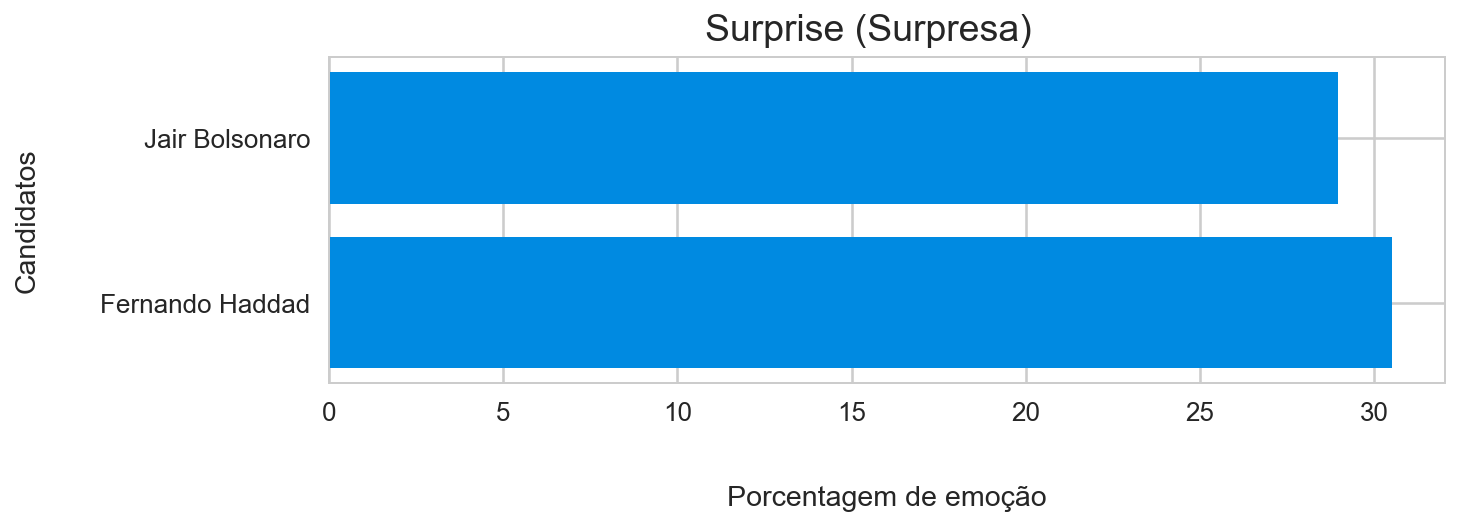

In [51]:
values = surprise_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#008ae1')
plt.suptitle('Surprise (Surpresa)')
plt.show()

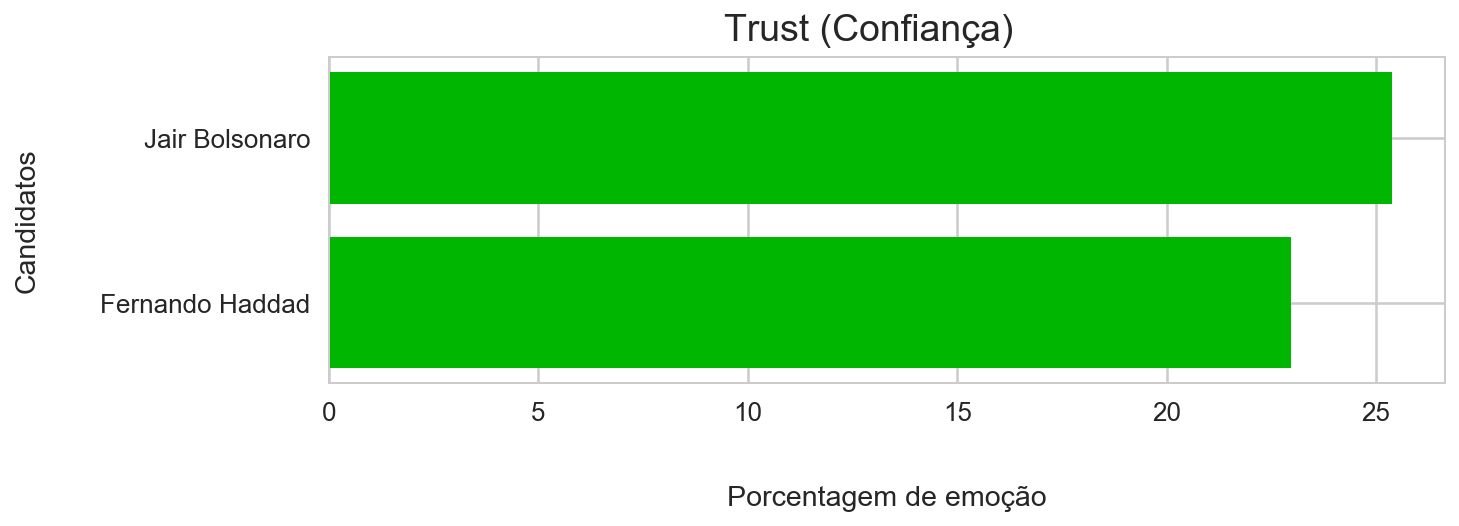

In [52]:
values = trust_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#00b600')
plt.suptitle('Trust (Confiança)')
plt.show()

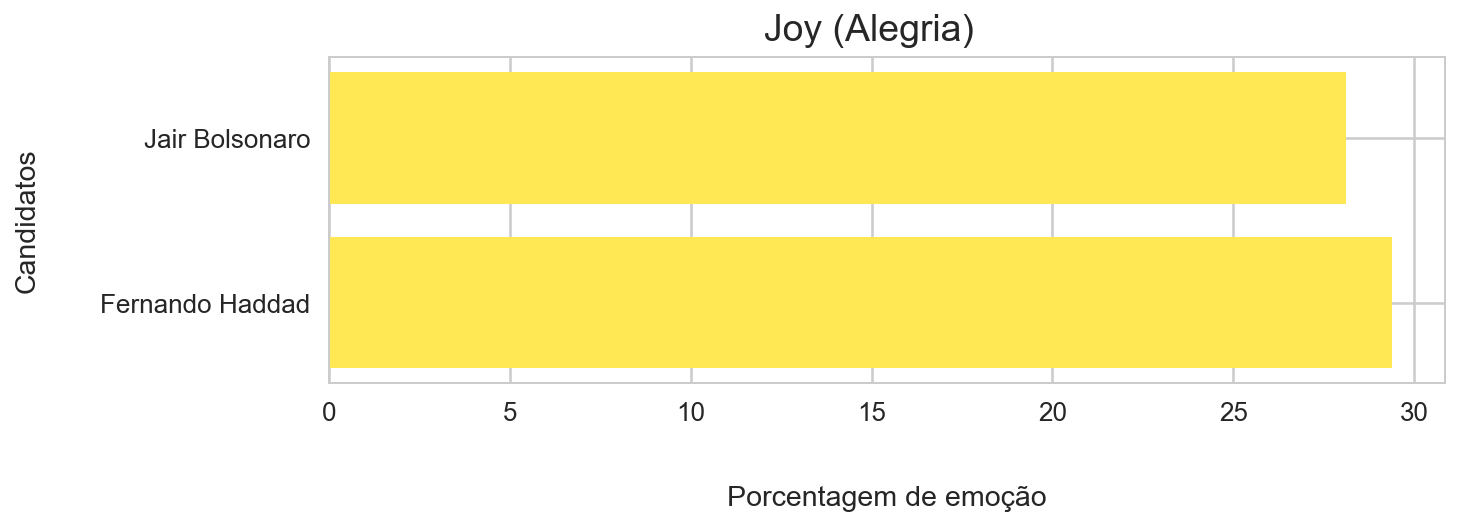

In [53]:
values = joy_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#ffe853')
plt.suptitle('Joy (Alegria)')
plt.show()

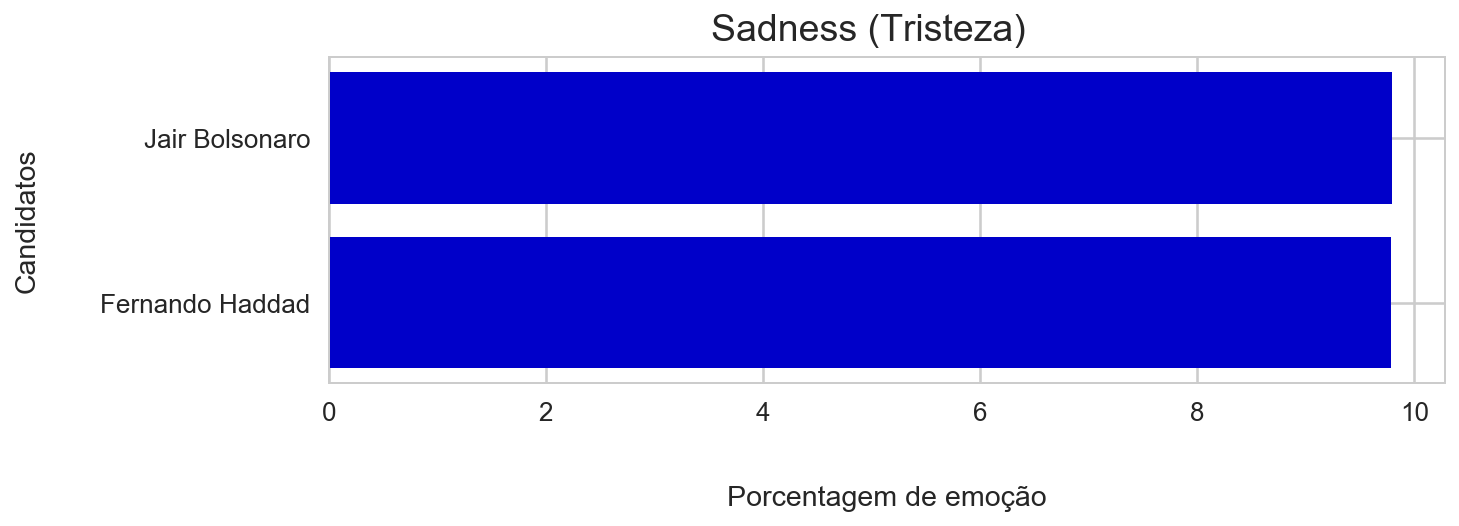

In [54]:
values = sadness_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#0000c9')
plt.suptitle('Sadness (Tristeza)')
plt.show()

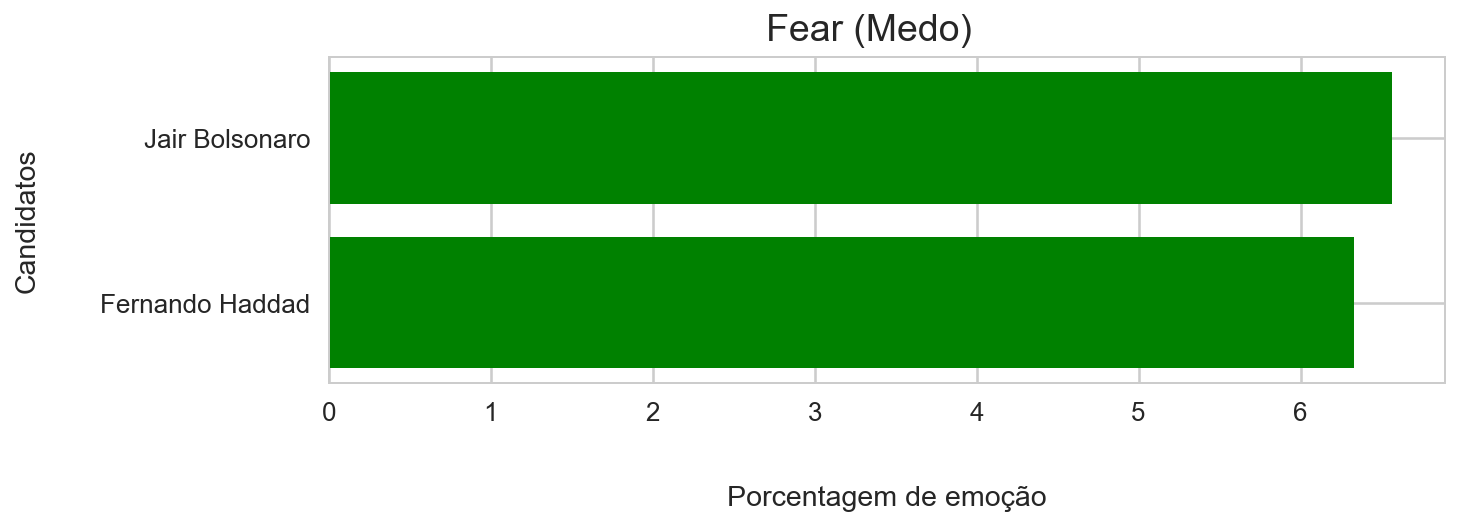

In [55]:
values = fear_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#008100')
plt.suptitle('Fear (Medo)')
plt.show()

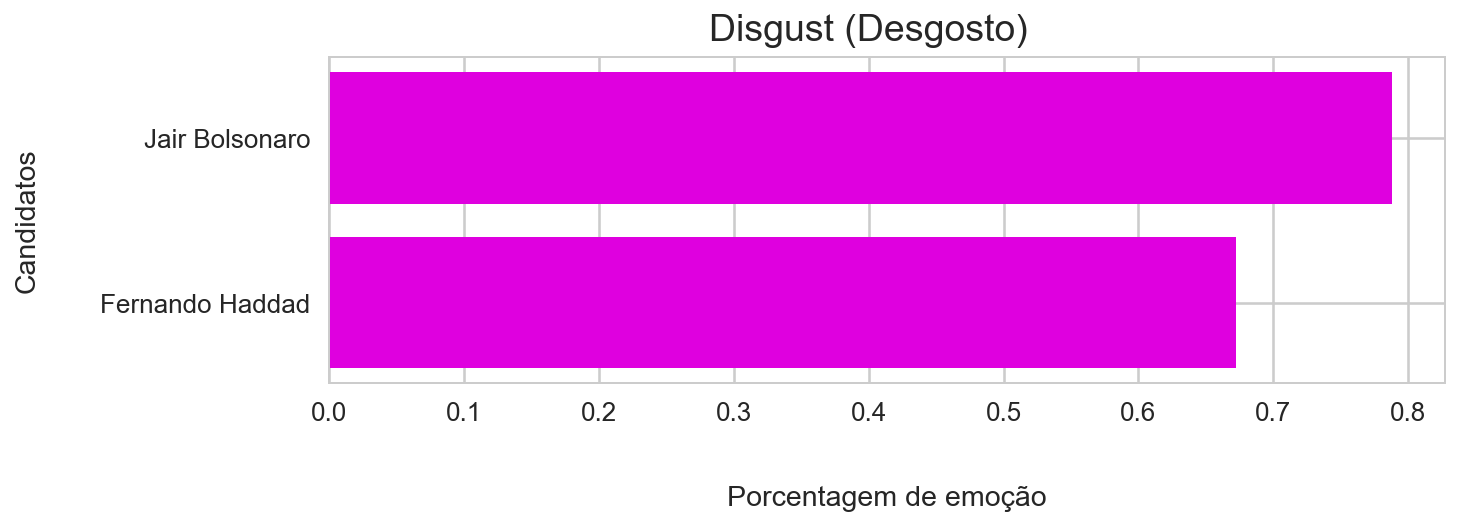

In [56]:
values = disgust_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#df00df')
plt.suptitle('Disgust (Desgosto)')
plt.show()

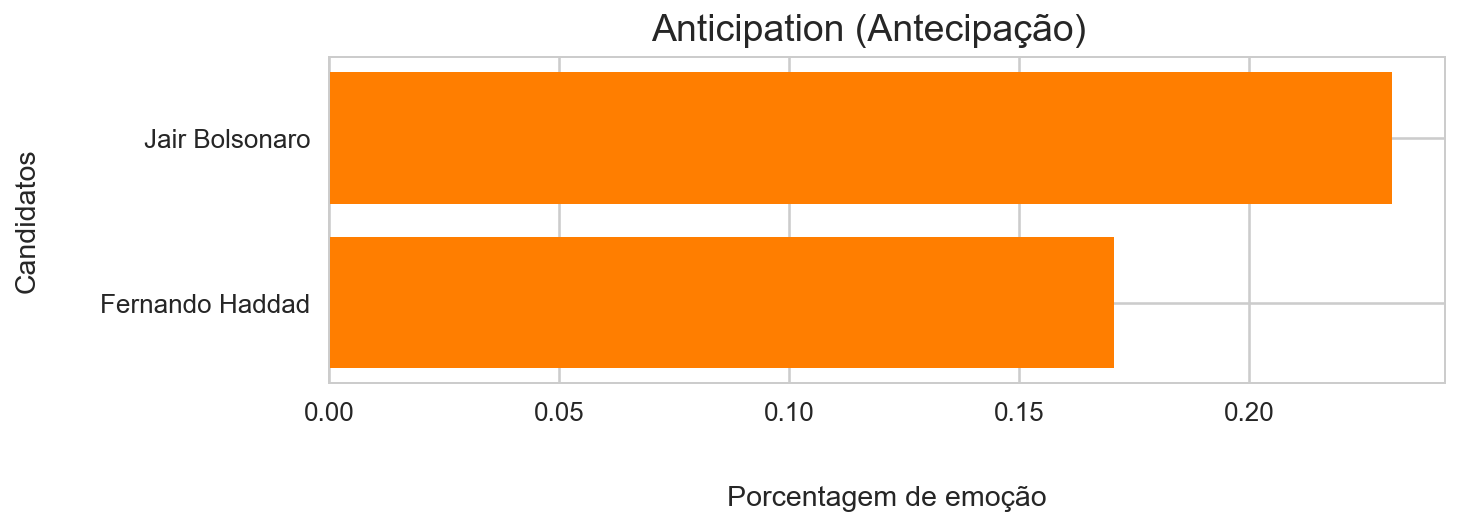

In [57]:
values = anticipation_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#ff7e00')
plt.suptitle('Anticipation (Antecipação)')
plt.show()

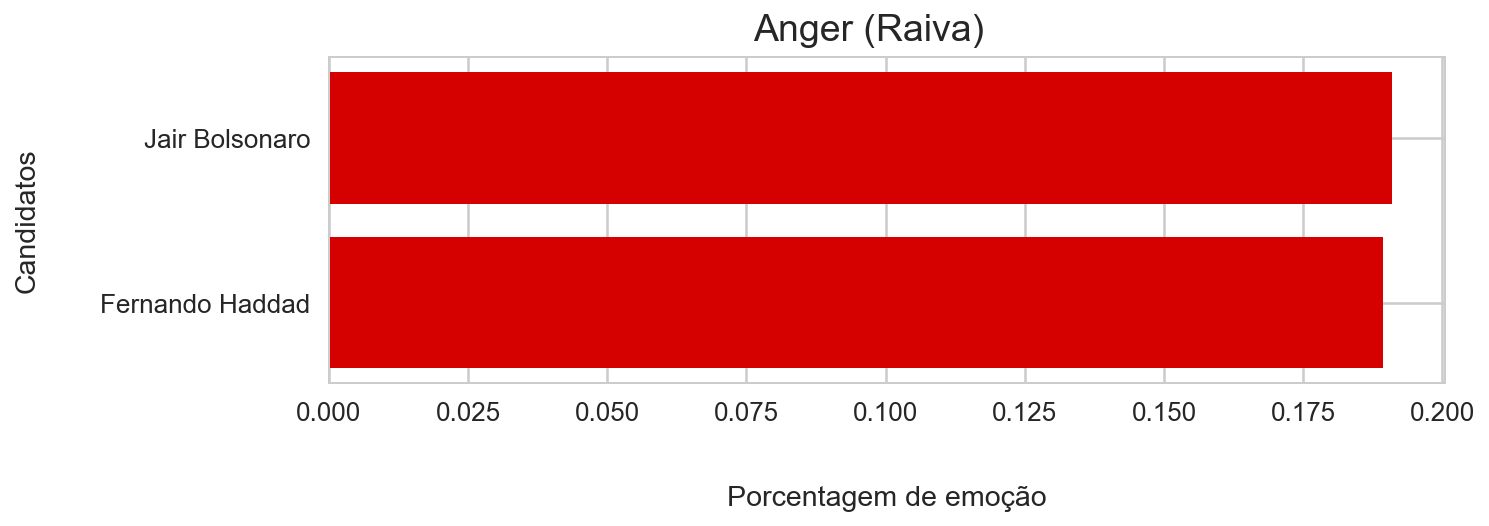

In [58]:
values = anger_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Candidatos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#d50000')
plt.suptitle('Anger (Raiva)')
plt.show()

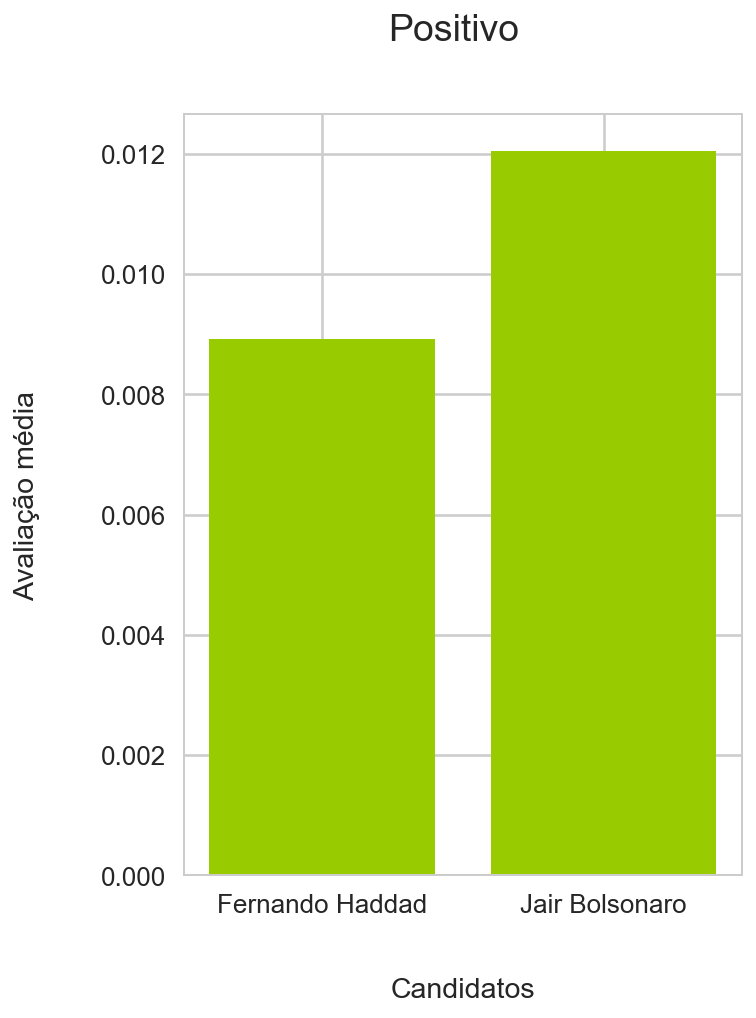

In [59]:
values = pos_percent

plt.figure(1, figsize=(5, 7))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Candidatos', labelpad=30)
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.suptitle('Positivo')
plt.show()

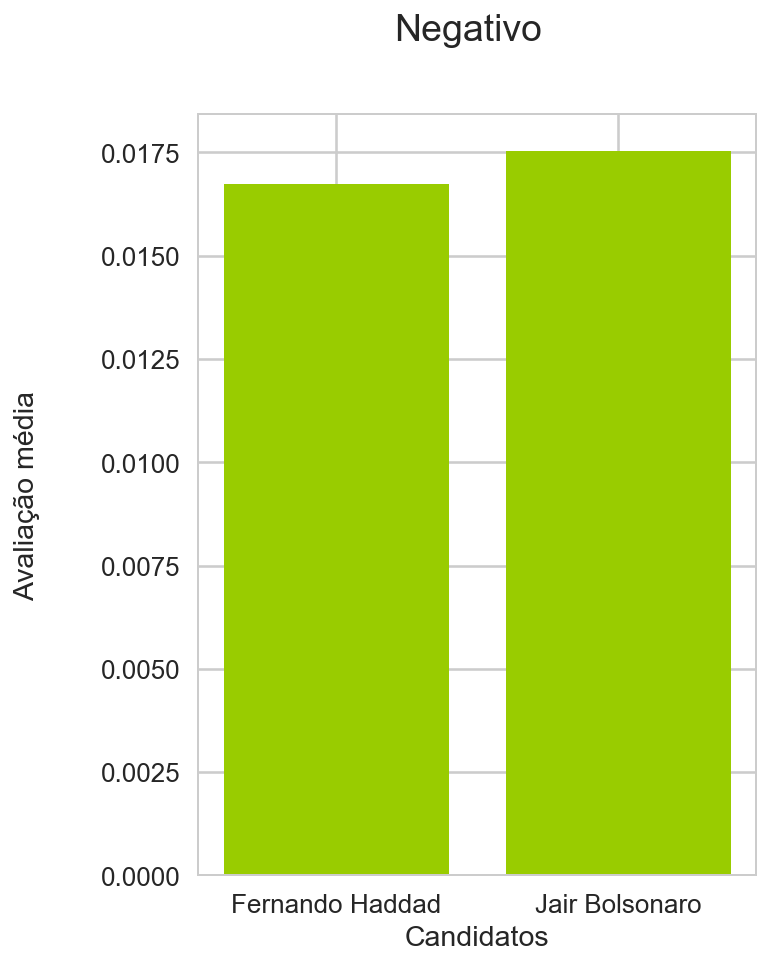

In [60]:
values = neg_percent

plt.figure(1, figsize=(5, 7))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Candidatos')
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.suptitle('Negativo')
plt.show()

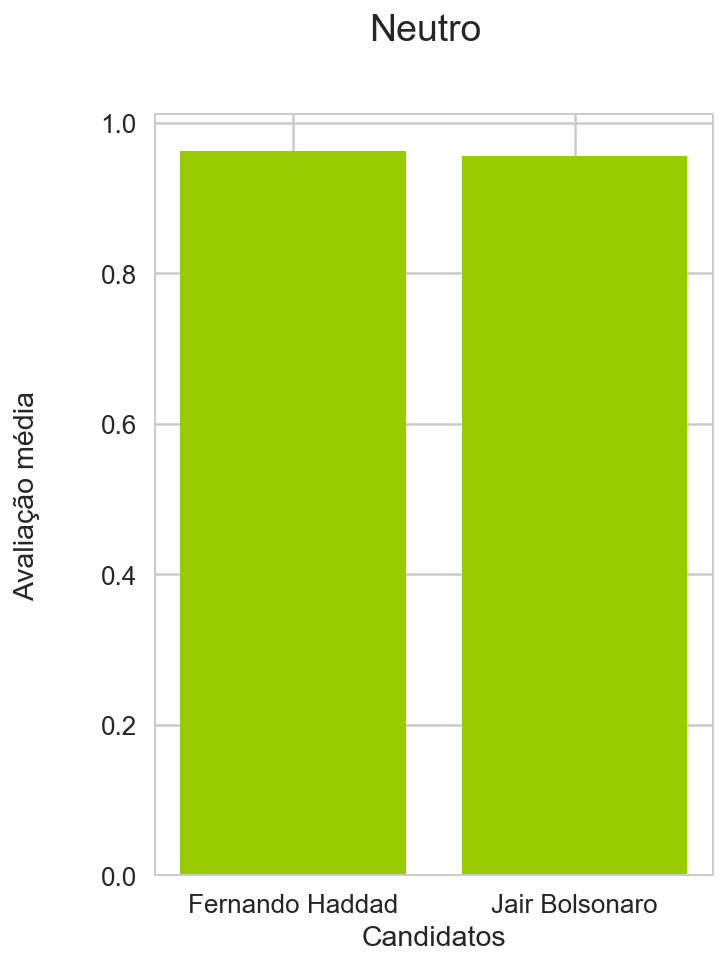

In [61]:
values = neu_percent

plt.figure(1, figsize=(5, 7))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Candidatos')
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.suptitle('Neutro')
plt.show()

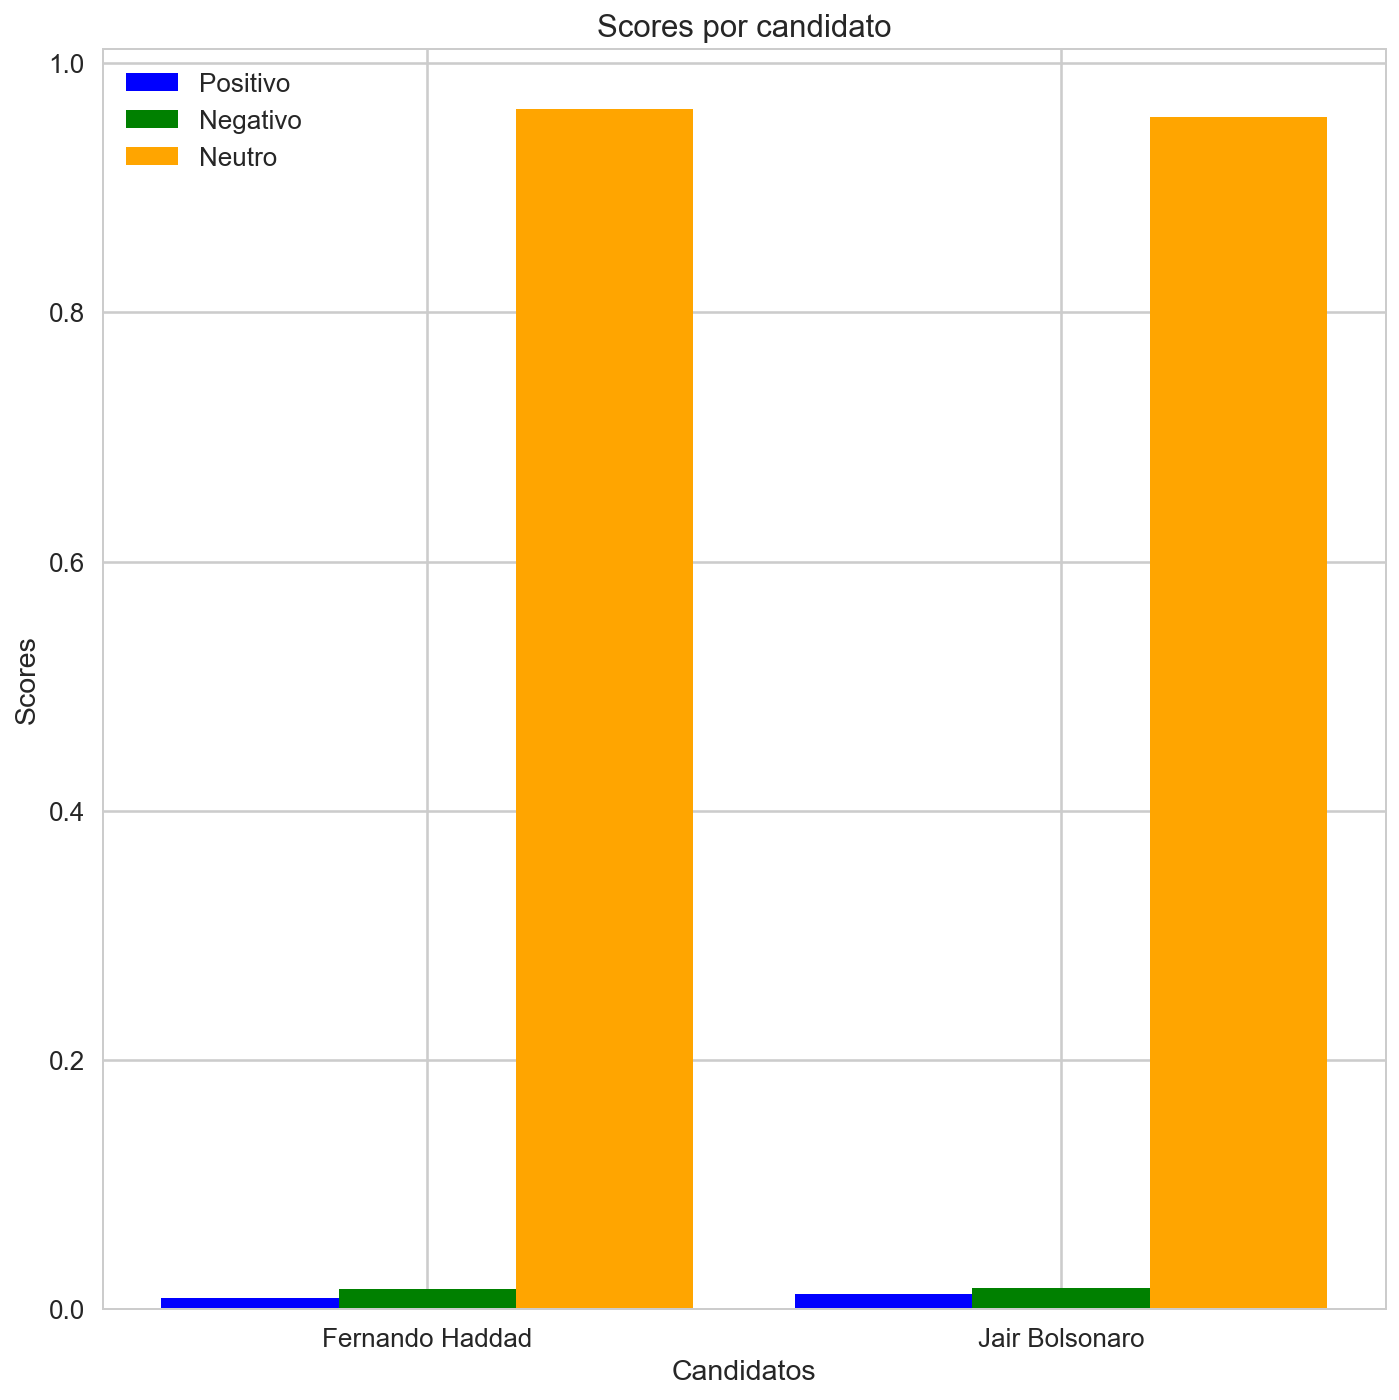

In [62]:
plt.rcParams['figure.figsize'] = (10,10)

# data to plot
n_groups = 2
pos = pos_percent
neg = neg_percent
neu = neu_percent
 
# create plot
index = np.arange(n_groups)
bar_width = 0.28
 
rects1 = plt.bar(index, pos, bar_width,
                 color='b',
                 label='Positivo')
 
rects2 = plt.bar(index + bar_width, neg, bar_width,
                 color='g',
                 label='Negativo')

rects3 = plt.bar(index + bar_width + bar_width, neu, bar_width,
                 color='orange',
                 label='Neutro')
 
plt.xlabel('Candidatos')
plt.ylabel('Scores')
plt.title('Scores por candidato')
plt.xticks(index + bar_width, names)
plt.legend()
 
plt.tight_layout()
plt.show()

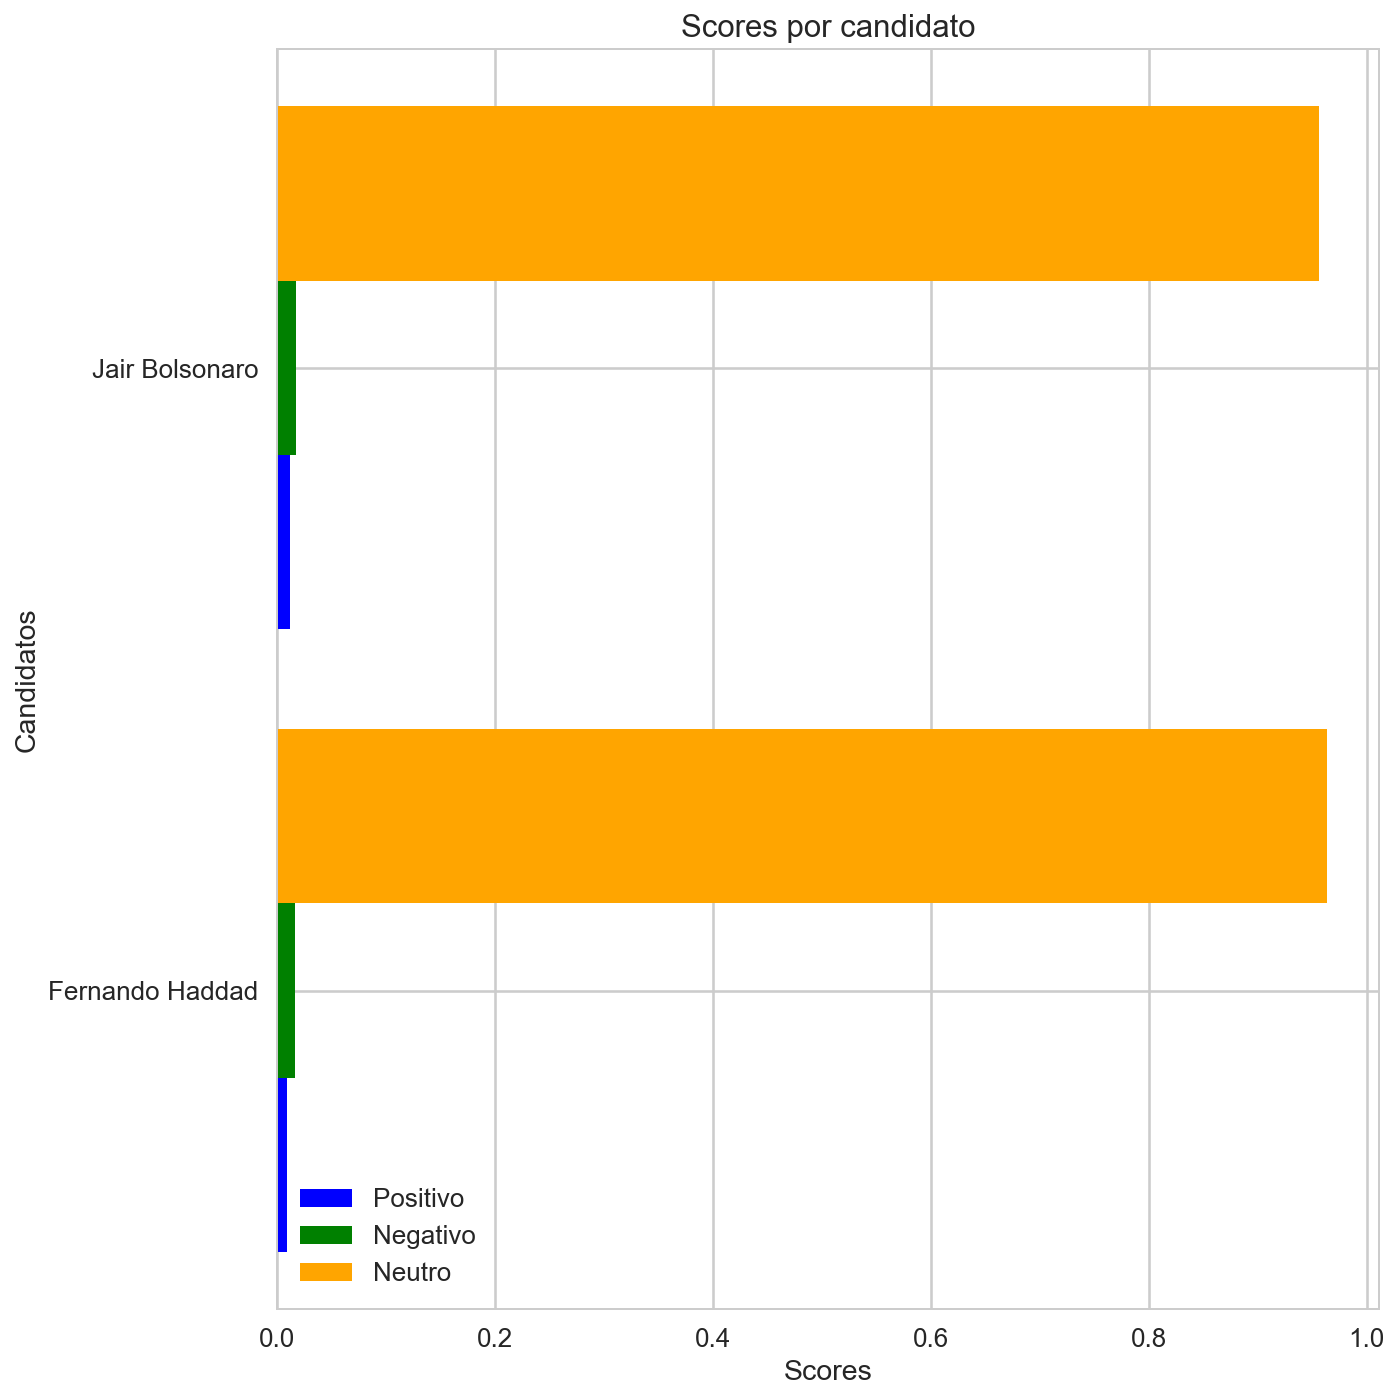

In [63]:
plt.rcParams['figure.figsize'] = (10,10)

# data to plot
n_groups = 2
pos = pos_percent
neg = neg_percent
neu = neu_percent
 
# create plot
index = np.arange(n_groups)
bar_width = 0.28
 
rects1 = plt.barh(index, pos, bar_width,
                 color='b',
                 label='Positivo')
 
rects2 = plt.barh(index + bar_width, neg, bar_width,
                 color='g',
                 label='Negativo')

rects3 = plt.barh(index + bar_width + bar_width, neu, bar_width,
                 color='orange',
                 label='Neutro')
 
plt.ylabel('Candidatos')
plt.xlabel('Scores')
plt.title('Scores por candidato')
plt.yticks(index + bar_width, names)
plt.legend()
 
plt.tight_layout()
plt.show()

### Eleições 2018

In [64]:
for turno, data_frame in eleicoes.items():
    print(turno)
    print(data_frame['Emotion'].value_counts())
    print('')

1 Turno
Surprise        14454
Trust            9111
Joy              6359
Fear             4401
Sadness          1294
Anticipation      130
Anger              72
Disgust            60
Name: Emotion, dtype: int64

2 Turno
Joy             14901
Surprise        11025
Sadness          7526
Trust            7001
Fear             4084
Anticipation      469
Disgust           250
Anger              36
Name: Emotion, dtype: int64



In [65]:
surprise_percent, trust_percent, joy_percent, fear_percent, sadness_percent, disgust_percent, anger_percent, anticipation_percent, pos_percent, neg_percent, neu_percent, compound_percent = [],[],[],[],[],[],[],[],[],[],[],[]

def emocao_valor(df):    
    surprise_percent.append(df['Emotion'].value_counts()['Surprise'] / len(df) * 100)
    trust_percent.append(df['Emotion'].value_counts()['Trust'] / len(df) * 100)
    joy_percent.append(df['Emotion'].value_counts()['Joy'] / len(df) * 100)
    sadness_percent.append(df['Emotion'].value_counts()['Sadness'] / len(df) * 100)
    fear_percent.append(df['Emotion'].value_counts()['Fear'] / len(df) * 100)
    disgust_percent.append(df['Emotion'].value_counts()['Disgust'] / len(df) * 100)
    anticipation_percent.append(df['Emotion'].value_counts()['Anticipation'] / len(df) * 100)
    anger_percent.append(df['Emotion'].value_counts()['Anger'] / len(df) * 100)
    
    pos_percent.append(df['pos'].mean())
    neg_percent.append(df['neg'].mean())
    neu_percent.append(df['neu'].mean())
    compound_percent.append(df['compound'].mean())

In [66]:
names = []

for turno, data_frame in eleicoes.items():
    emocao_valor(data_frame)
    names.append(turno)

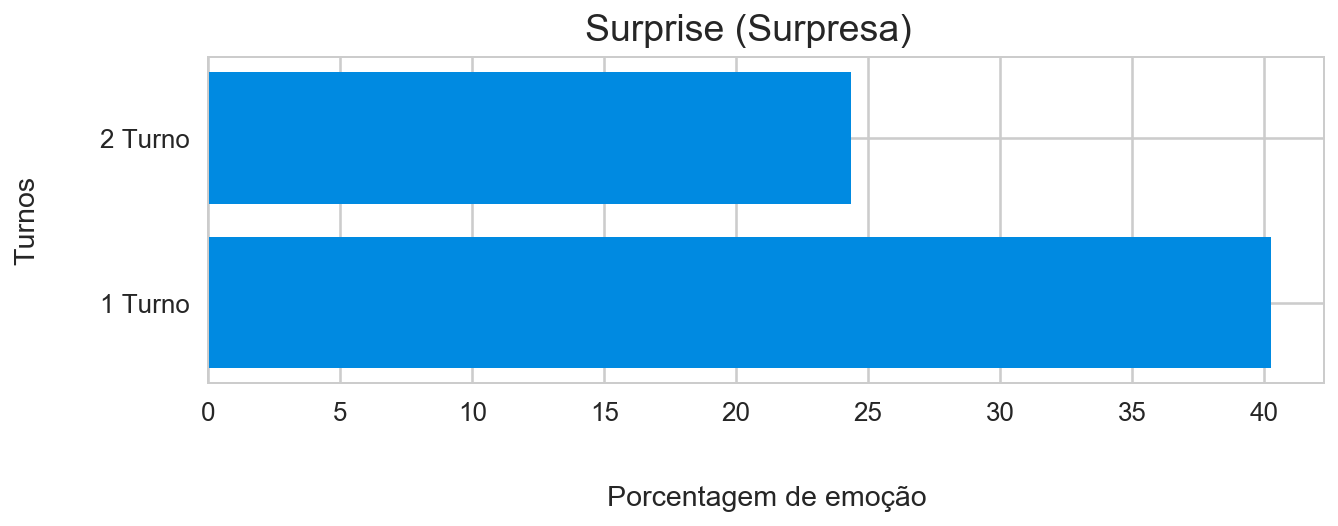

In [67]:
values = surprise_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Turnos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#008ae1')
plt.suptitle('Surprise (Surpresa)')
plt.show()

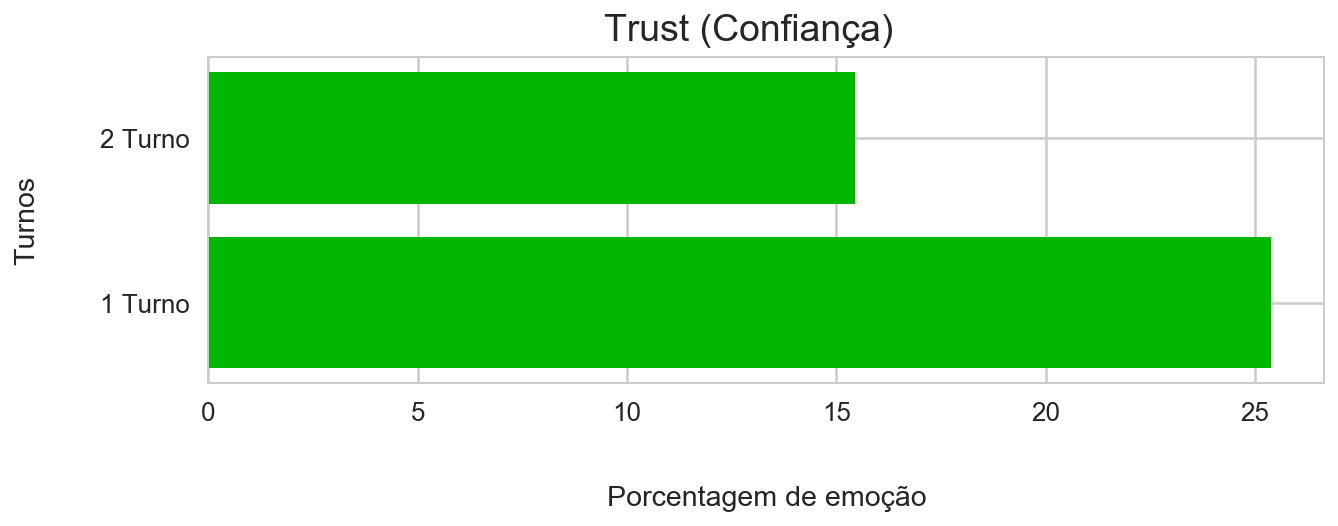

In [68]:
values = trust_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Turnos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#00b600')
plt.suptitle('Trust (Confiança)')
plt.show()

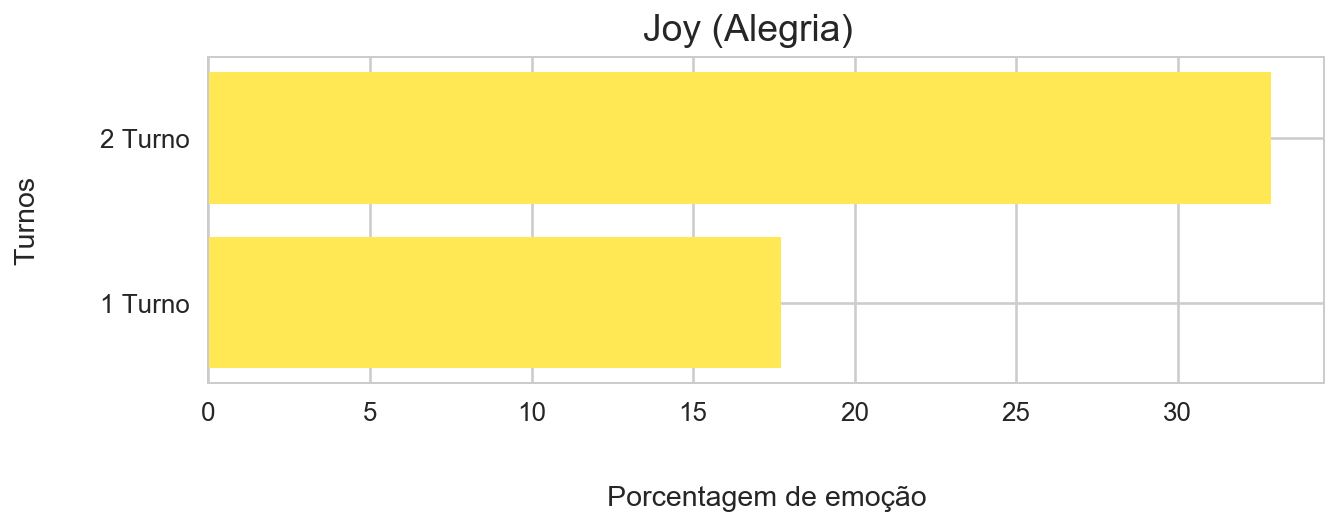

In [69]:
values = joy_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Turnos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#ffe853')
plt.suptitle('Joy (Alegria)')
plt.show()

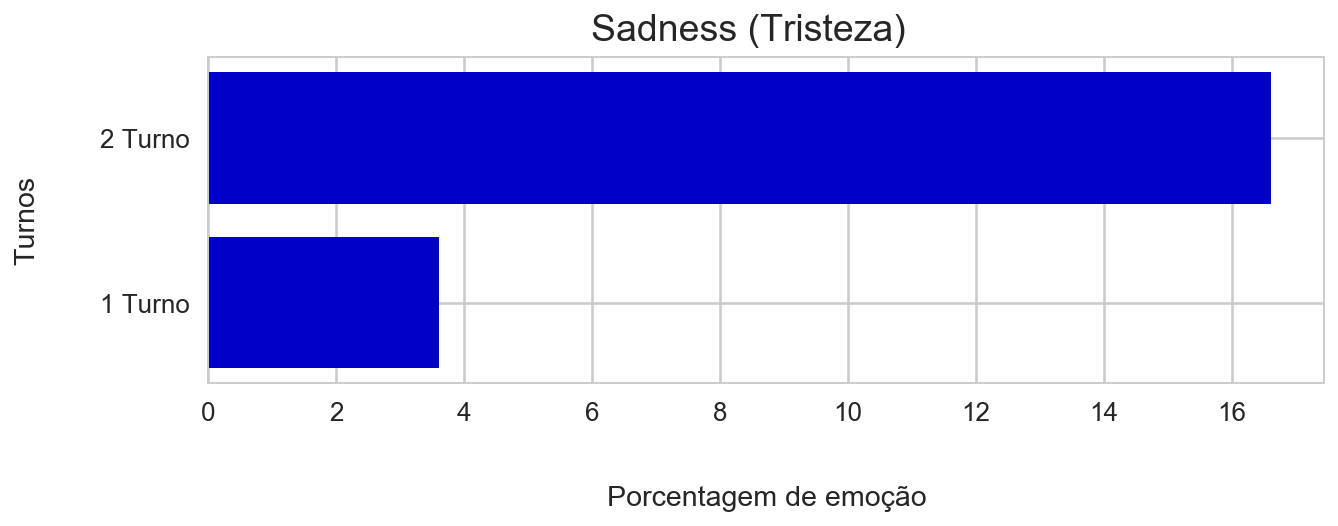

In [70]:
values = sadness_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Turnos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#0000c9')
plt.suptitle('Sadness (Tristeza)')
plt.show()

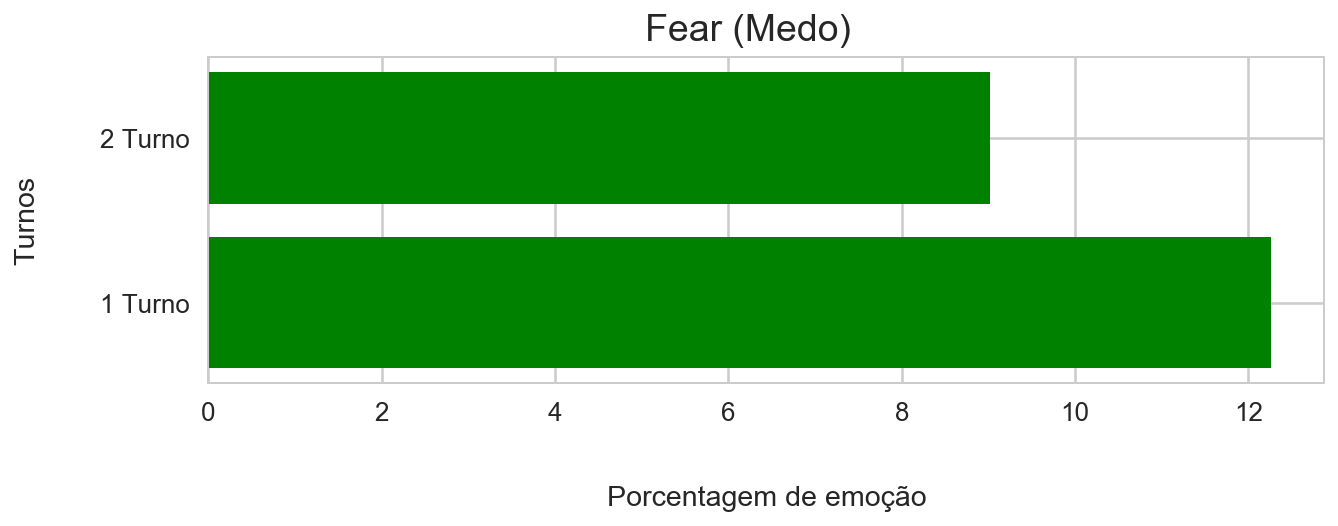

In [71]:
values = fear_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Turnos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#008100')
plt.suptitle('Fear (Medo)')
plt.show()

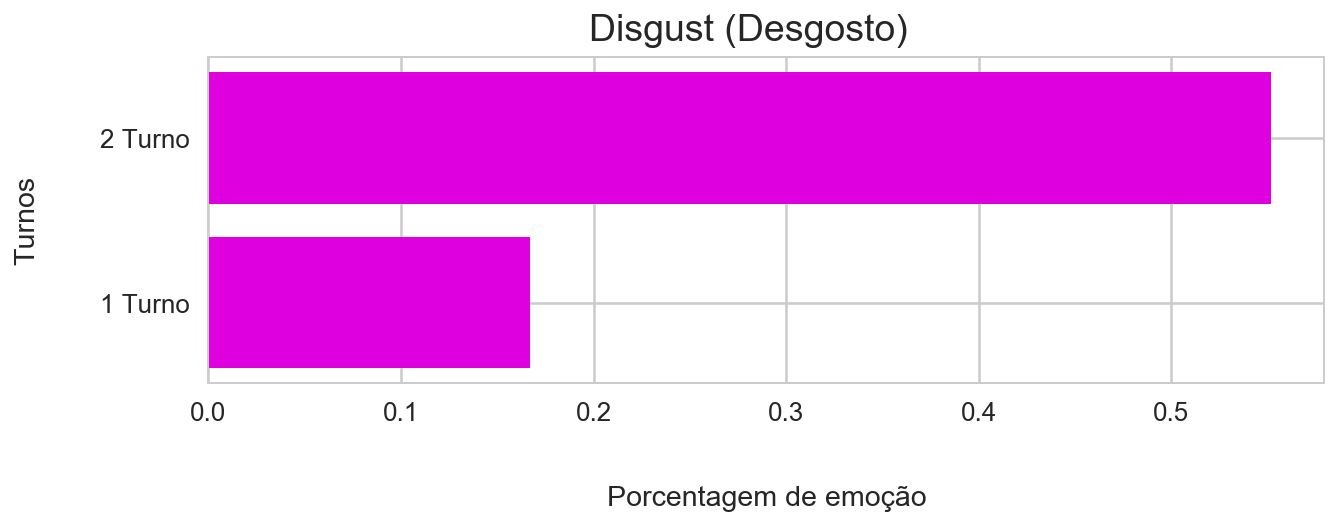

In [72]:
values = disgust_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Turnos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#df00df')
plt.suptitle('Disgust (Desgosto)')
plt.show()

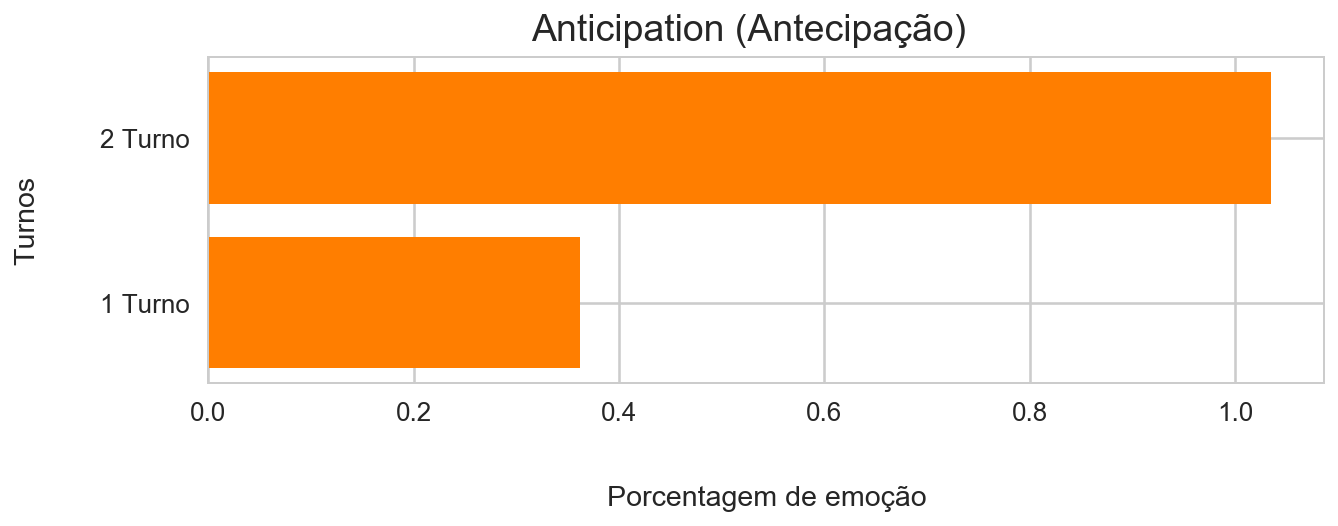

In [73]:
values = anticipation_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Turnos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#ff7e00')
plt.suptitle('Anticipation (Antecipação)')
plt.show()

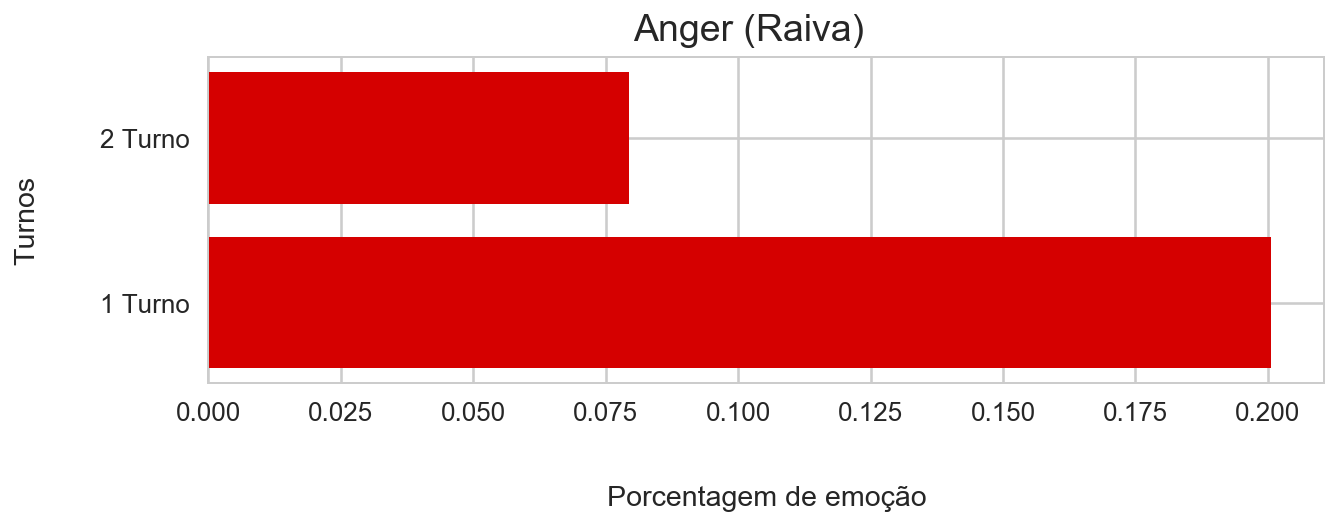

In [74]:
values = anger_percent

plt.figure(1, figsize=(10, 3))

sns.set(style="whitegrid", context="talk")

plt.ylabel('Turnos', labelpad=30)
plt.xlabel('Porcentagem de emoção', labelpad=30)
plt.barh(names, values, color='#d50000')
plt.suptitle('Anger (Raiva)')
plt.show()

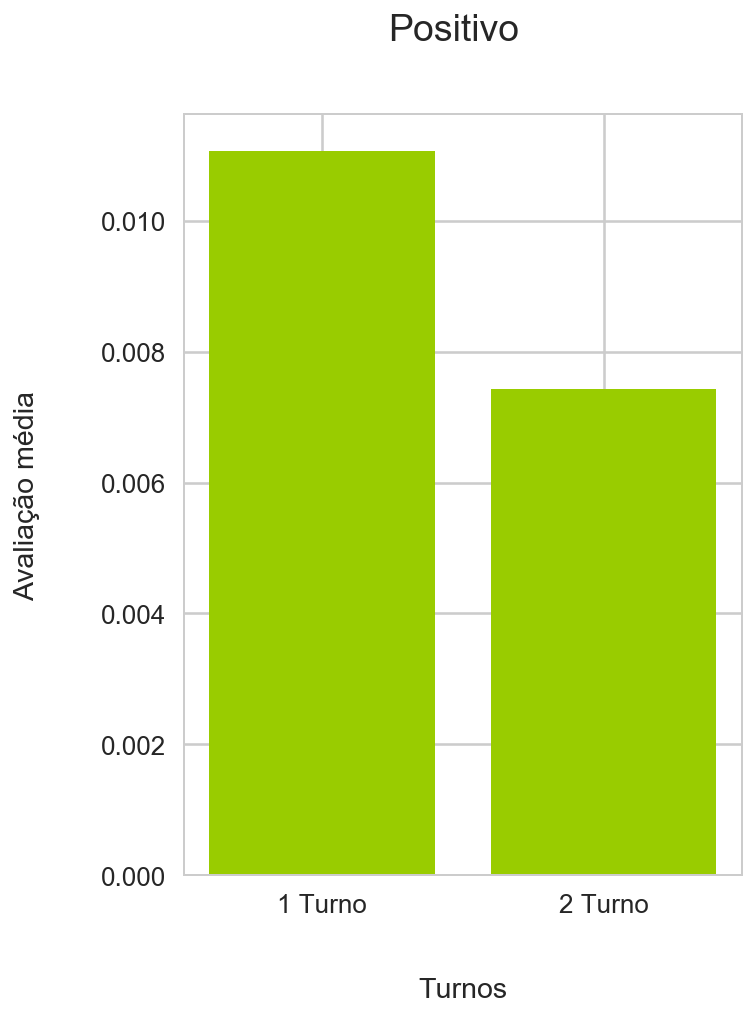

In [75]:
values = pos_percent

plt.figure(1, figsize=(5, 7))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Turnos', labelpad=30)
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.suptitle('Positivo')
plt.show()

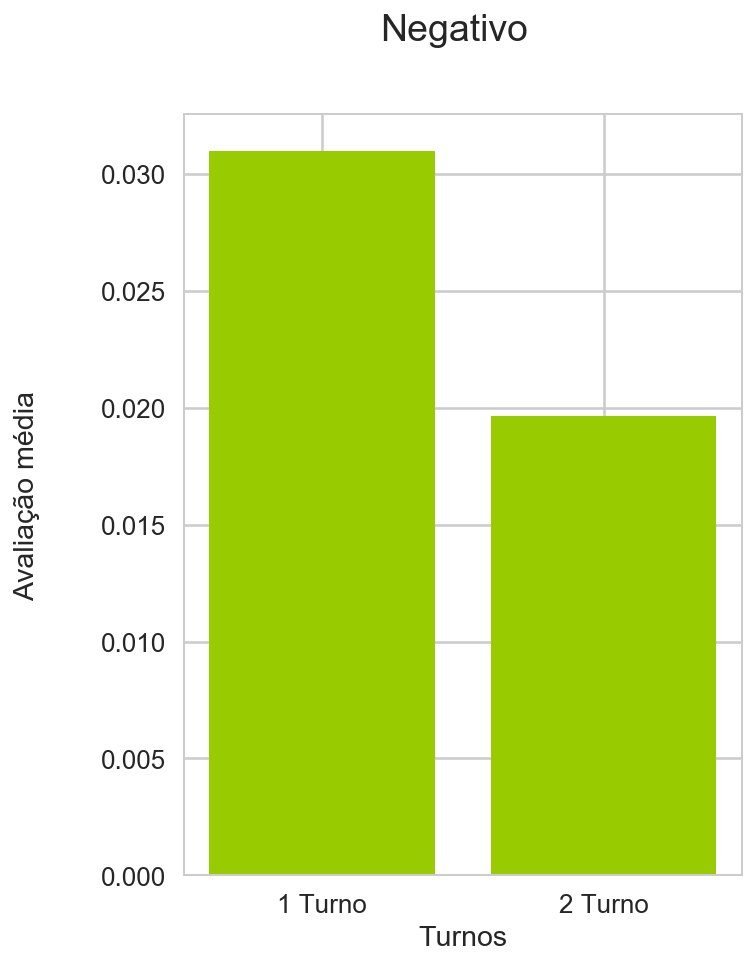

In [76]:
values = neg_percent

plt.figure(1, figsize=(5, 7))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Turnos')
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.suptitle('Negativo')
plt.show()

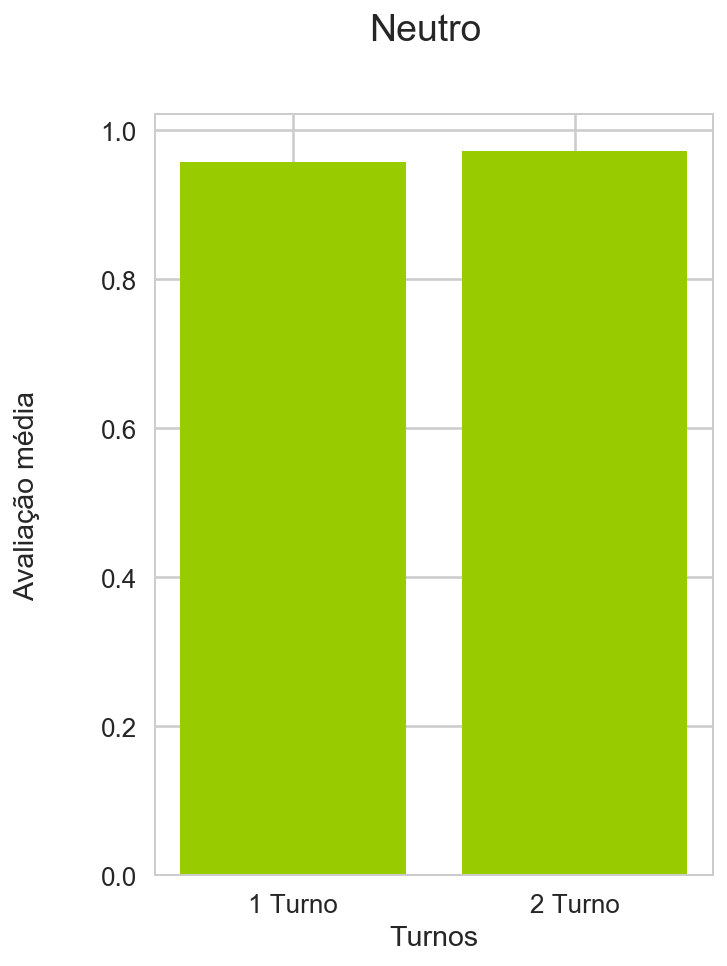

In [77]:
values = neu_percent

plt.figure(1, figsize=(5, 7))

sns.set(style="whitegrid", context="talk")

plt.xlabel('Turnos')
plt.ylabel('Avaliação média', labelpad=30)
plt.bar(names, values, color='#99cc00')
plt.suptitle('Neutro')
plt.show()

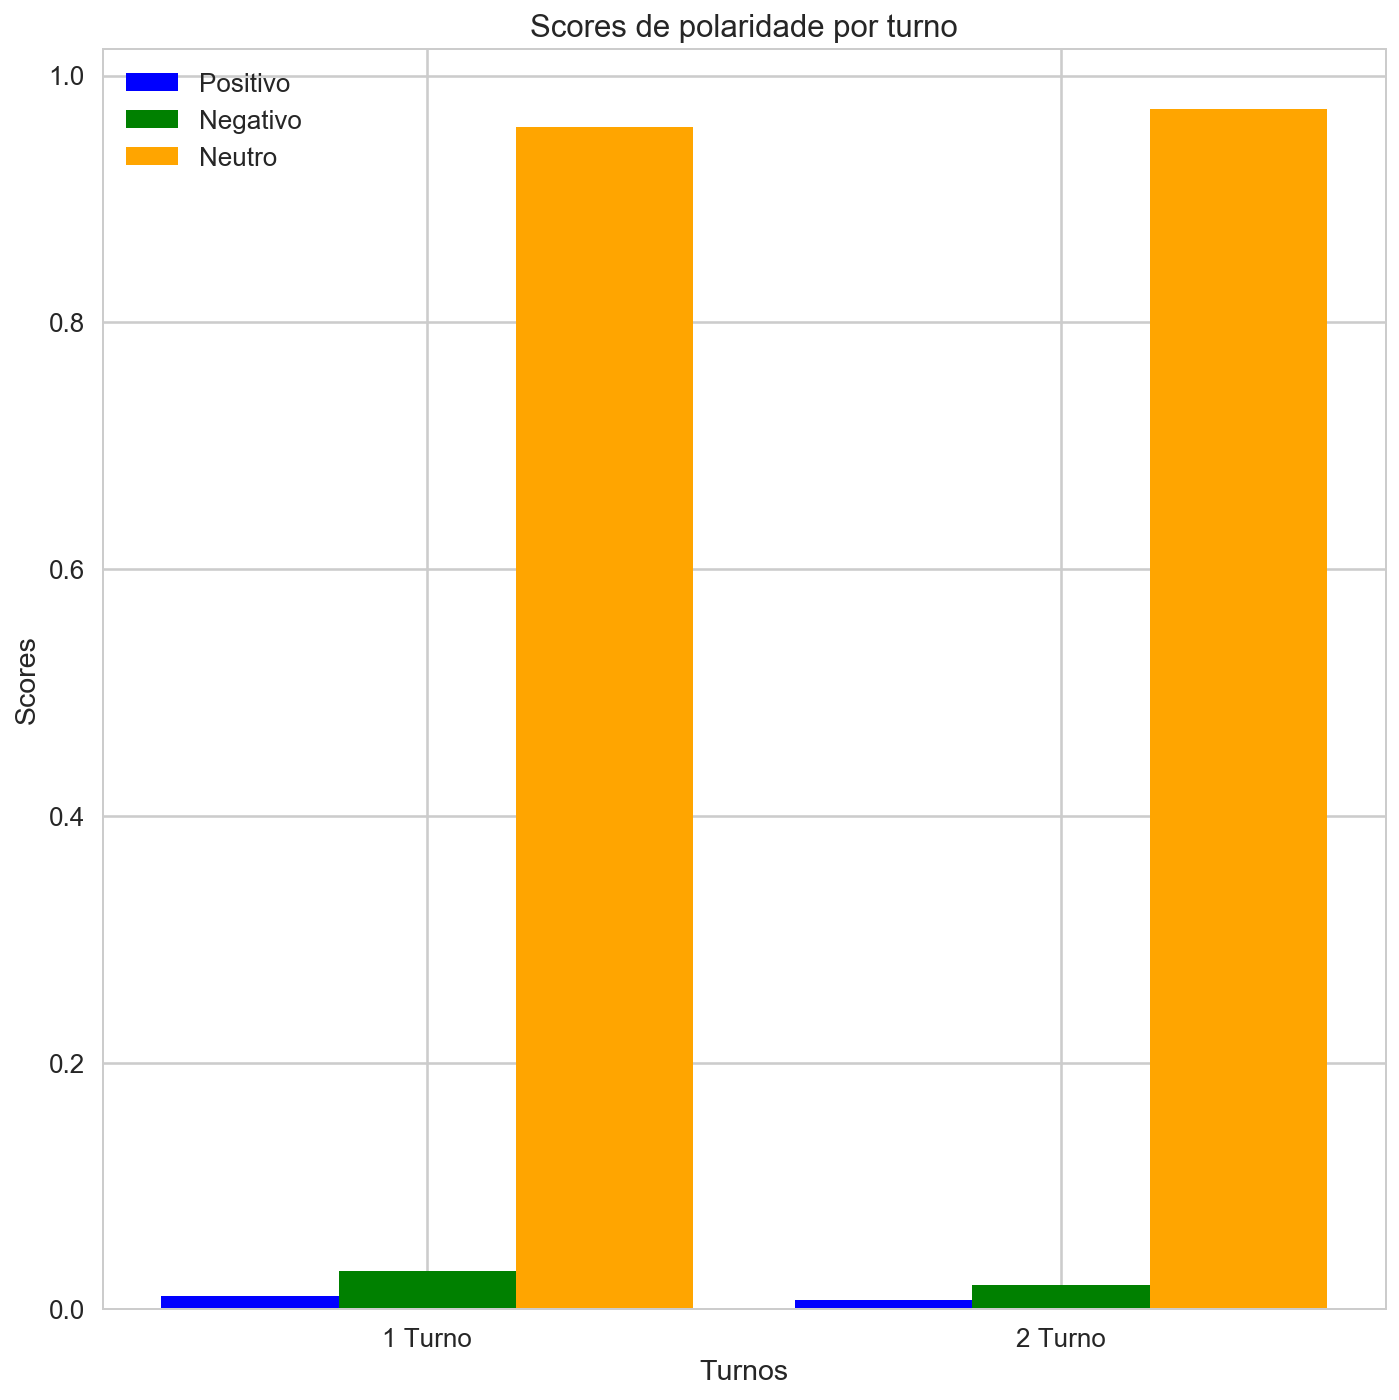

In [78]:
plt.rcParams['figure.figsize'] = (10,10)

# data to plot
n_groups = 2
pos = pos_percent
neg = neg_percent
neu = neu_percent
 
# create plot
index = np.arange(n_groups)
bar_width = 0.28
 
rects1 = plt.bar(index, pos, bar_width,
                 color='b',
                 label='Positivo')
 
rects2 = plt.bar(index + bar_width, neg, bar_width,
                 color='g',
                 label='Negativo')

rects3 = plt.bar(index + bar_width + bar_width, neu, bar_width,
                 color='orange',
                 label='Neutro')
 
plt.xlabel('Turnos')
plt.ylabel('Scores')
plt.title('Scores de polaridade por turno')
plt.xticks(index + bar_width, names)
plt.legend()
 
plt.tight_layout()
plt.show()

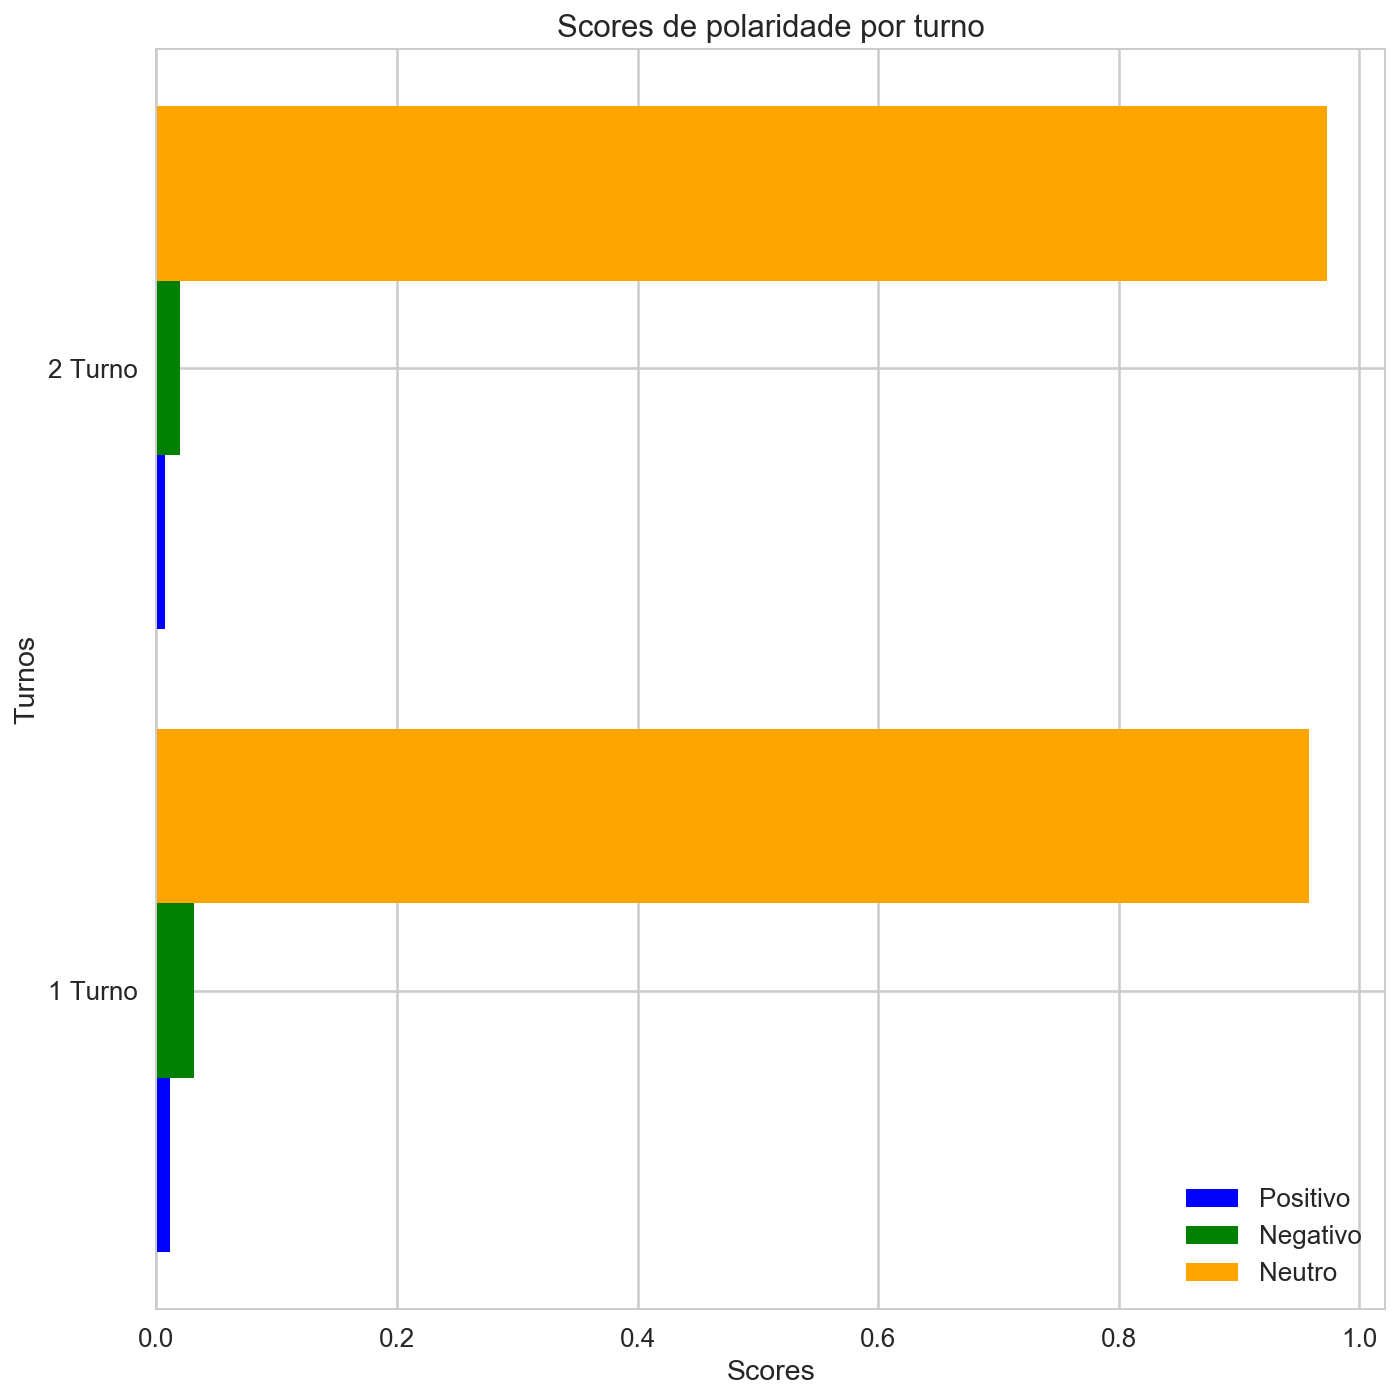

In [79]:
plt.rcParams['figure.figsize'] = (10,10)

# data to plot
n_groups = 2
pos = pos_percent
neg = neg_percent
neu = neu_percent
 
# create plot
index = np.arange(n_groups)
bar_width = 0.28
 
rects1 = plt.barh(index, pos, bar_width,
                 color='b',
                 label='Positivo')
 
rects2 = plt.barh(index + bar_width, neg, bar_width,
                 color='g',
                 label='Negativo')

rects3 = plt.barh(index + bar_width + bar_width, neu, bar_width,
                 color='orange',
                 label='Neutro')
 
plt.ylabel('Turnos')
plt.xlabel('Scores')
plt.title('Scores de polaridade por turno')
plt.yticks(index + bar_width, names)
plt.legend()
 
plt.tight_layout()
plt.show()